In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [83]:
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(breast_data['data'], breast_data['target'], random_state=42, test_size=0.2)



accuracy=0.8947368421052632, f1=0.9130434782608696, precision=0.9402985074626866, recall=0.8873239436619719


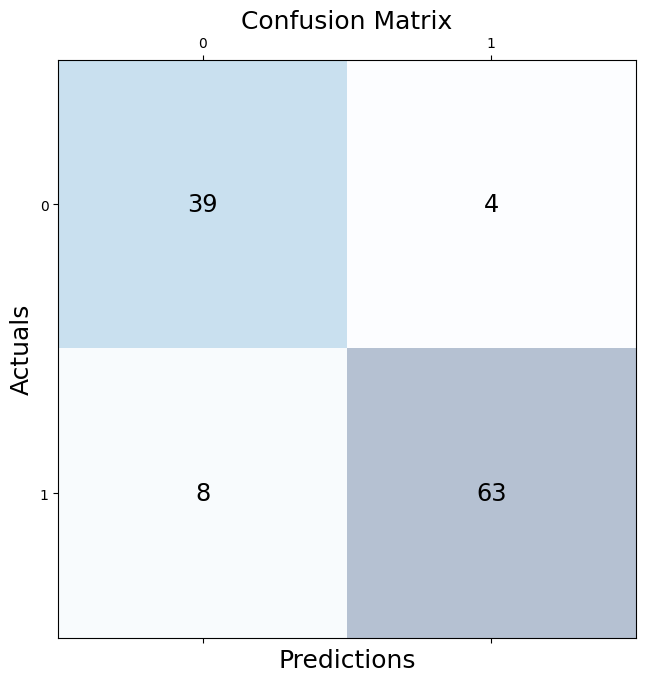

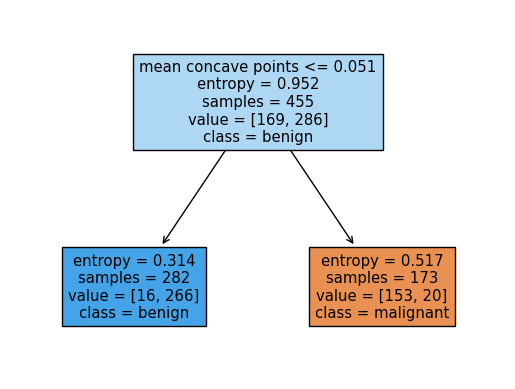

accuracy=0.9122807017543859, f1=0.9264705882352942, precision=0.9692307692307692, recall=0.8873239436619719


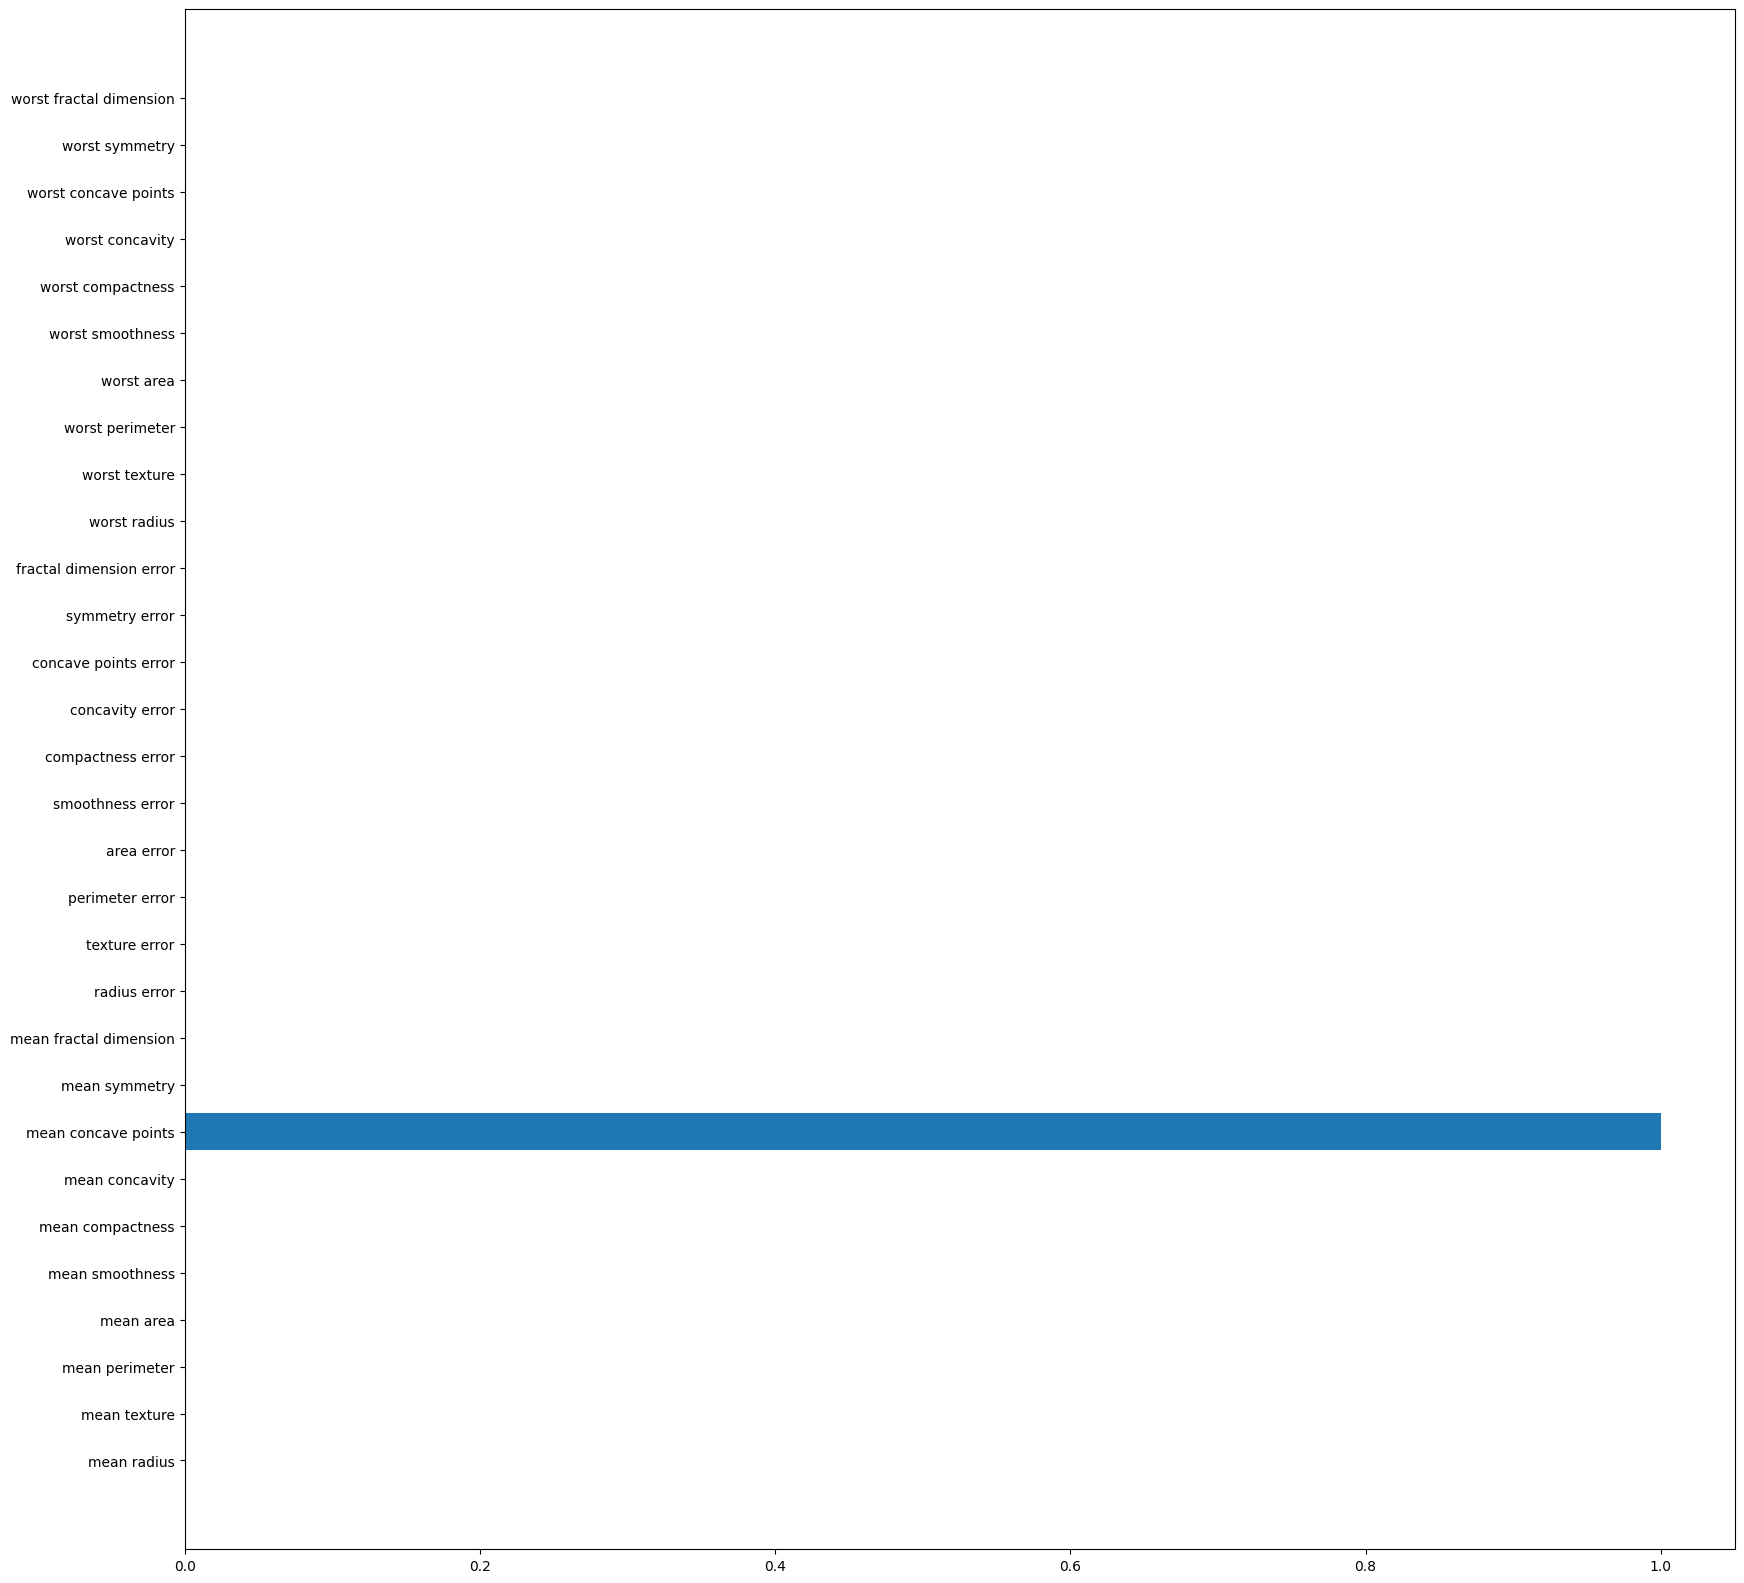

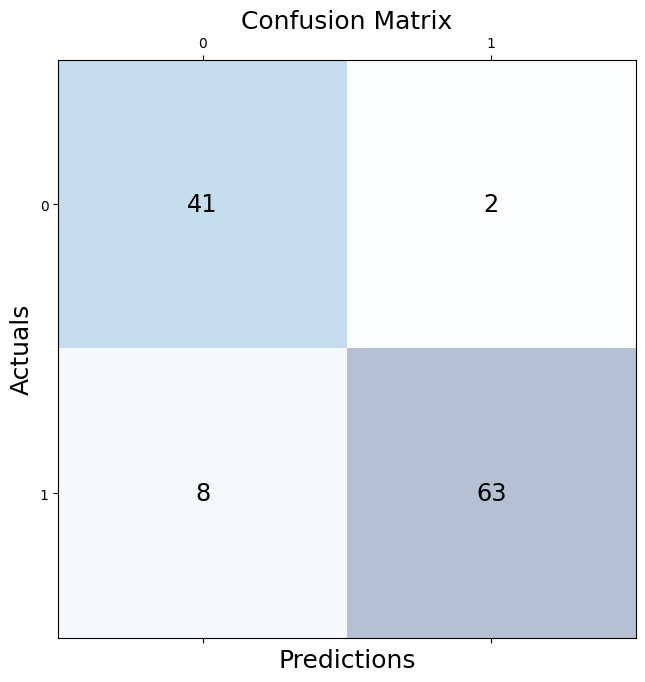

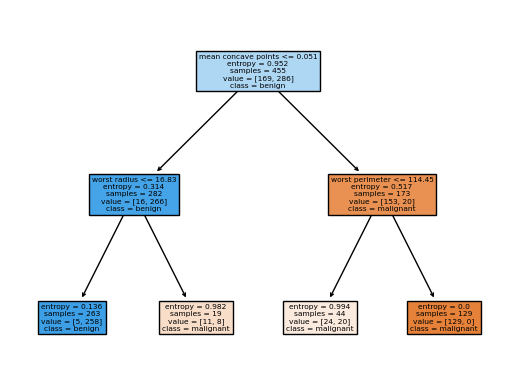

accuracy=0.9649122807017544, f1=0.9726027397260273, precision=0.9466666666666667, recall=1.0


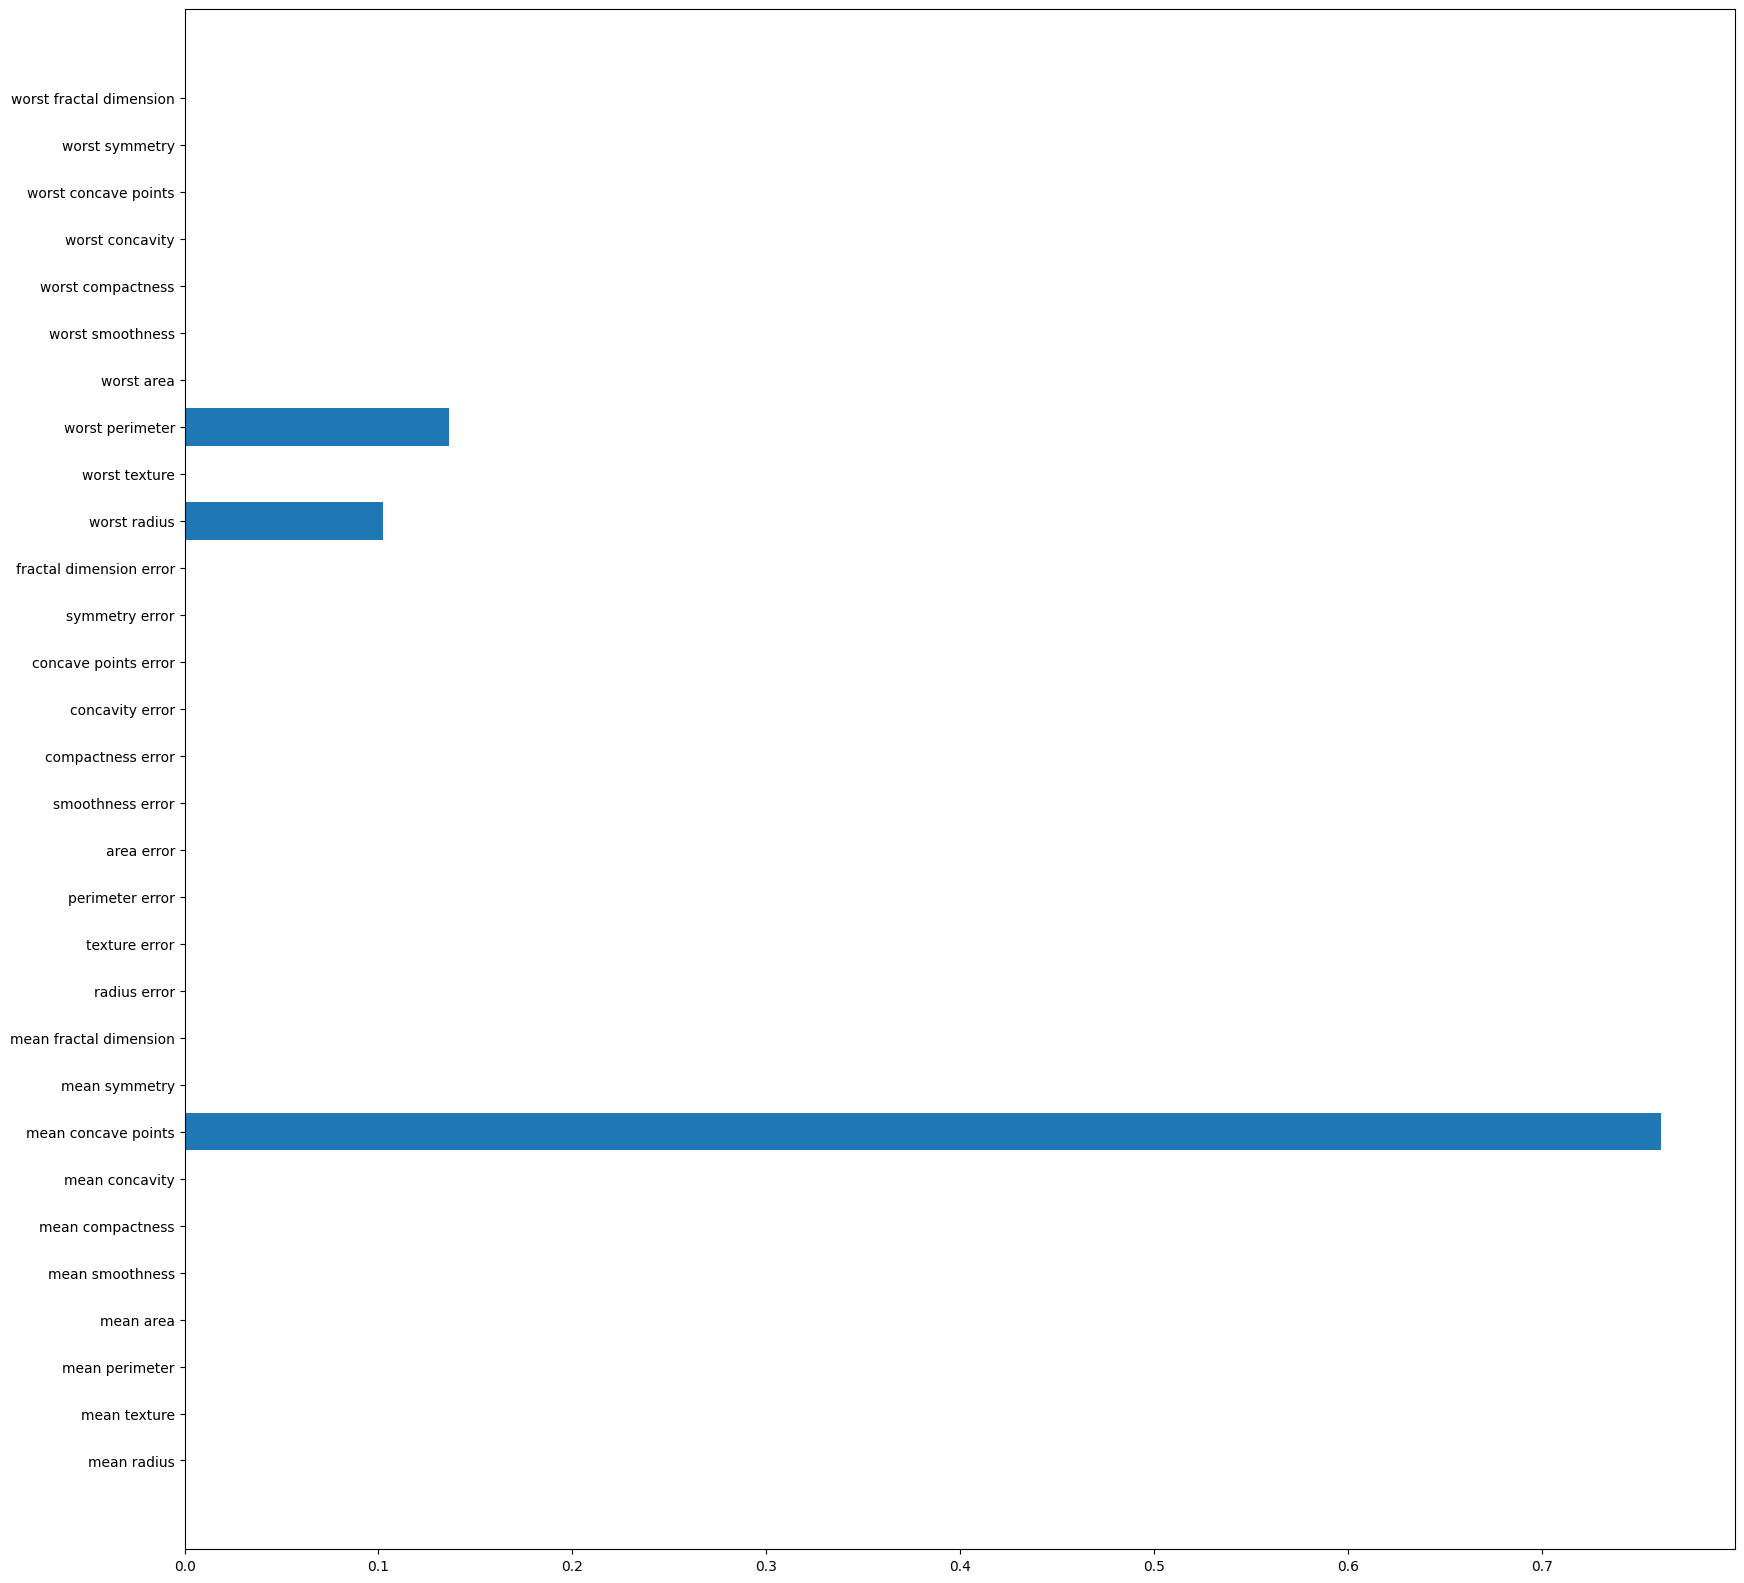

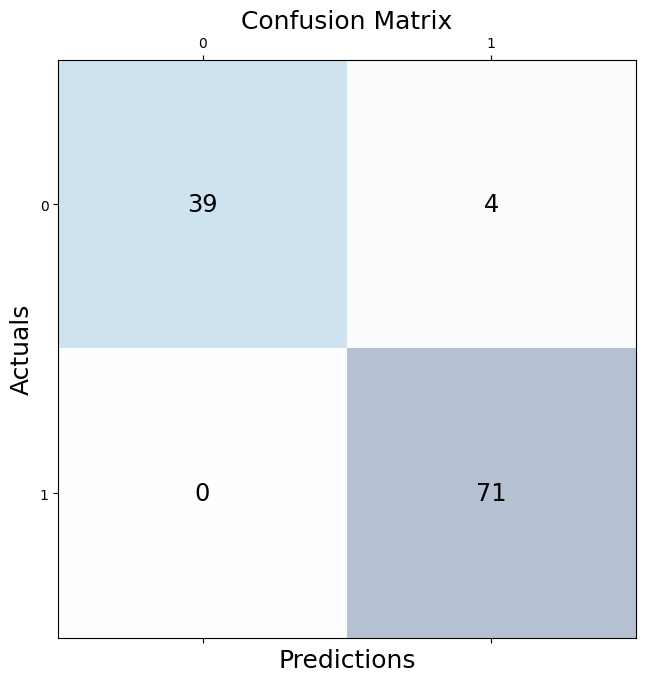

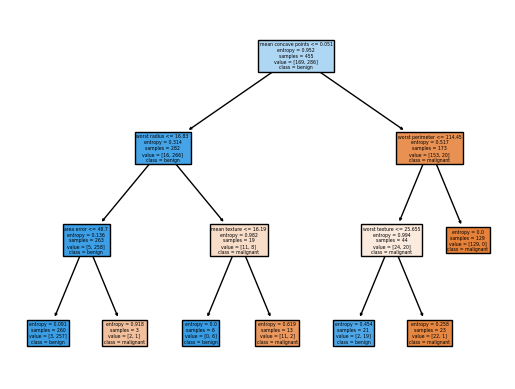

accuracy=0.956140350877193, f1=0.9655172413793103, precision=0.9459459459459459, recall=0.9859154929577465


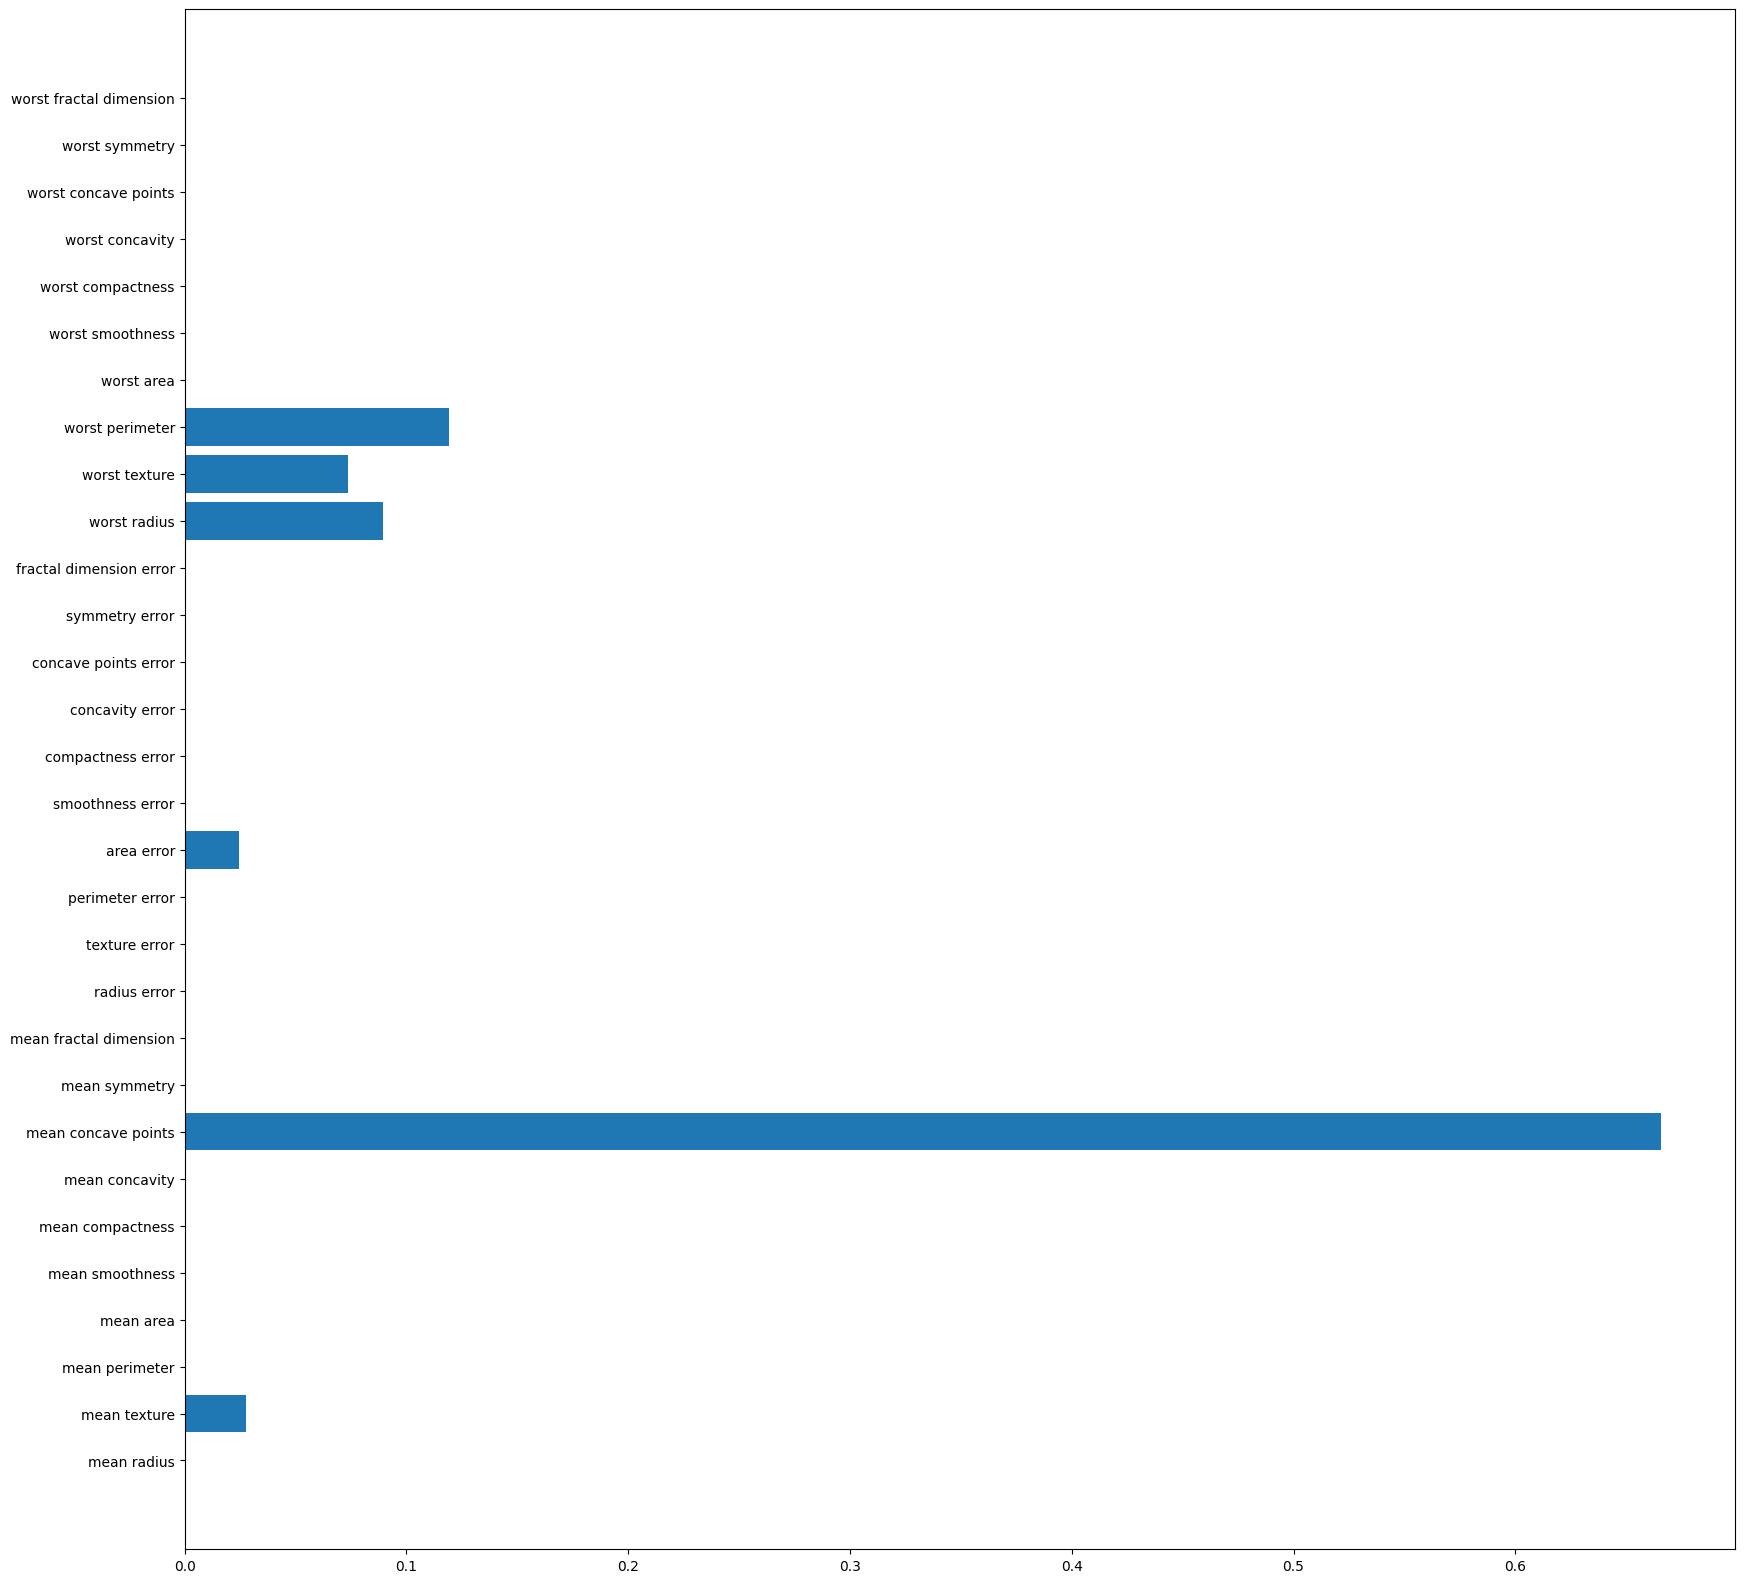

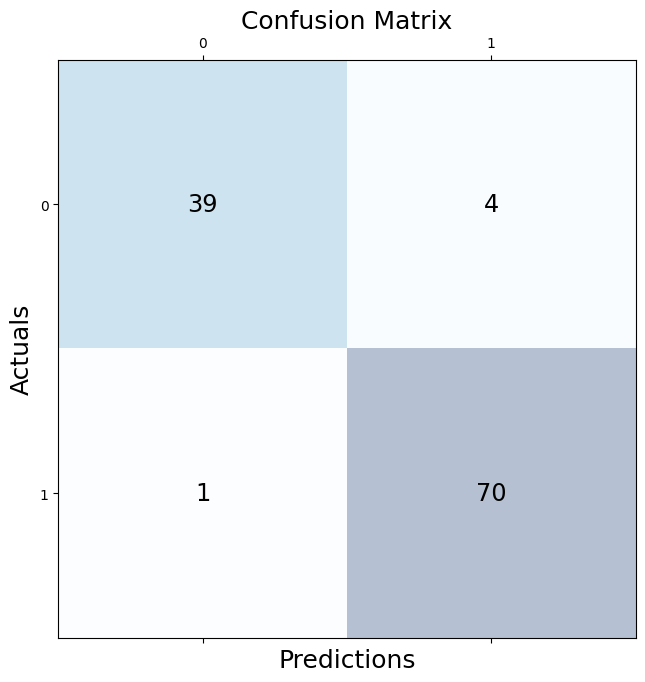

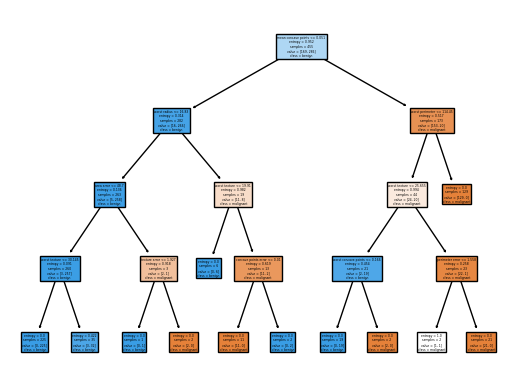

accuracy=0.9473684210526315, f1=0.9589041095890412, precision=0.9333333333333333, recall=0.9859154929577465


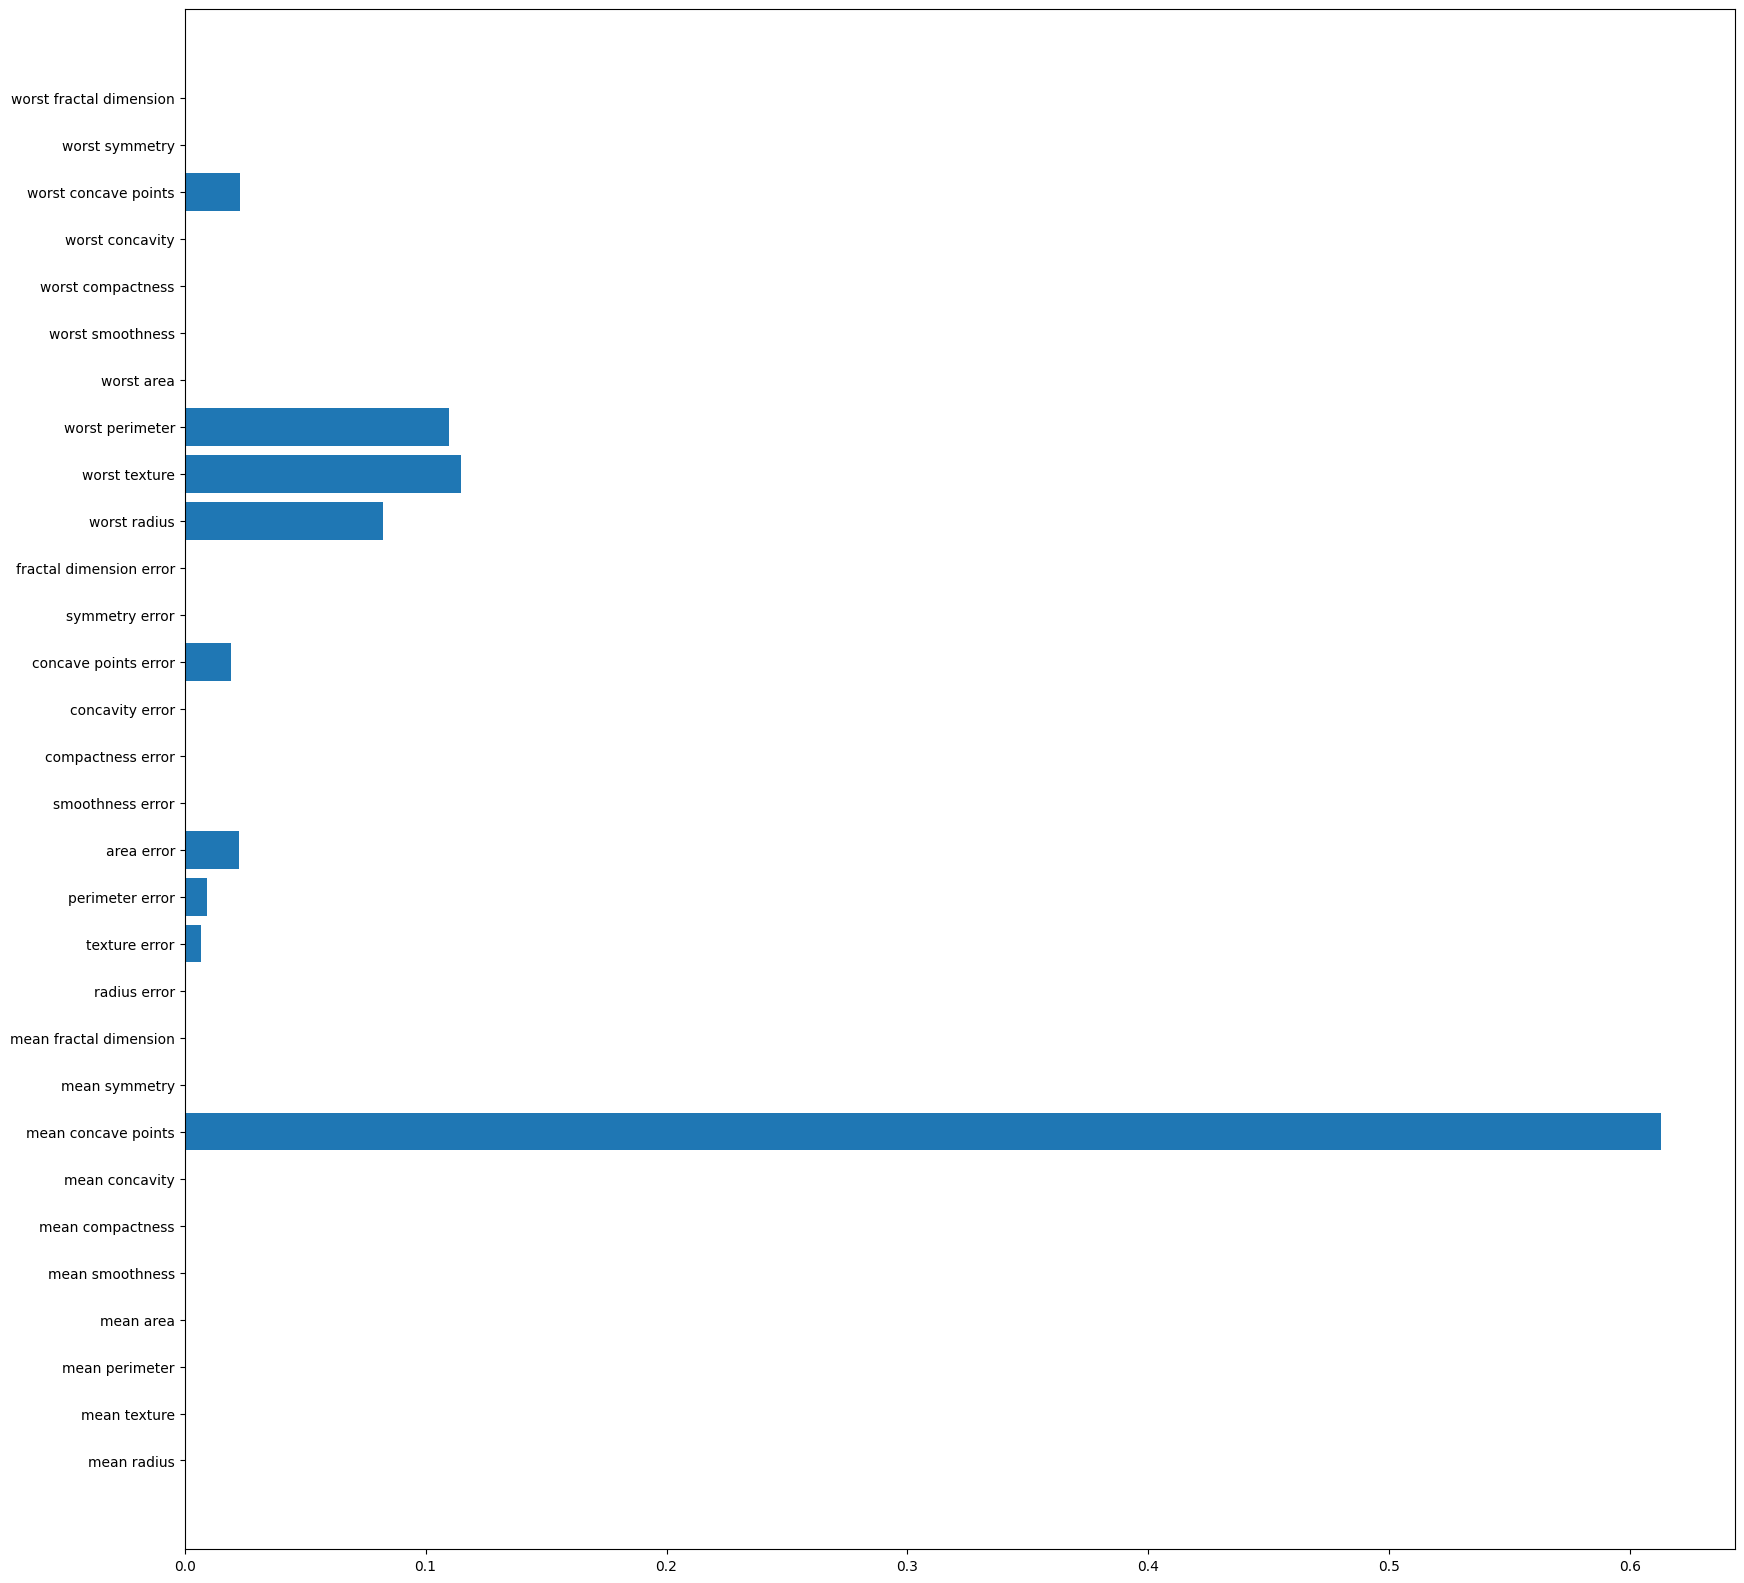

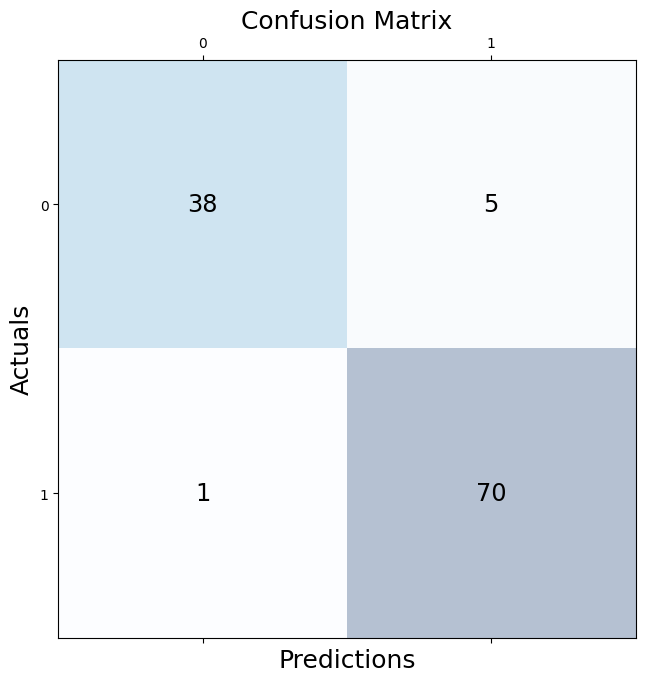

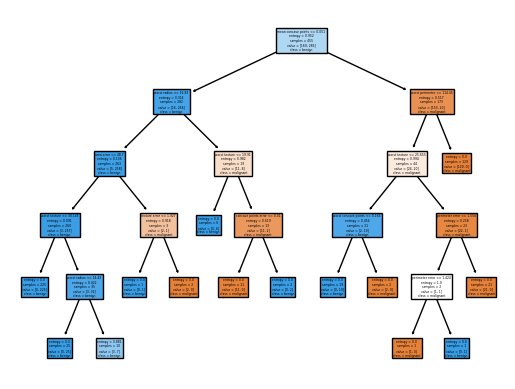

accuracy=0.9473684210526315, f1=0.9589041095890412, precision=0.9333333333333333, recall=0.9859154929577465


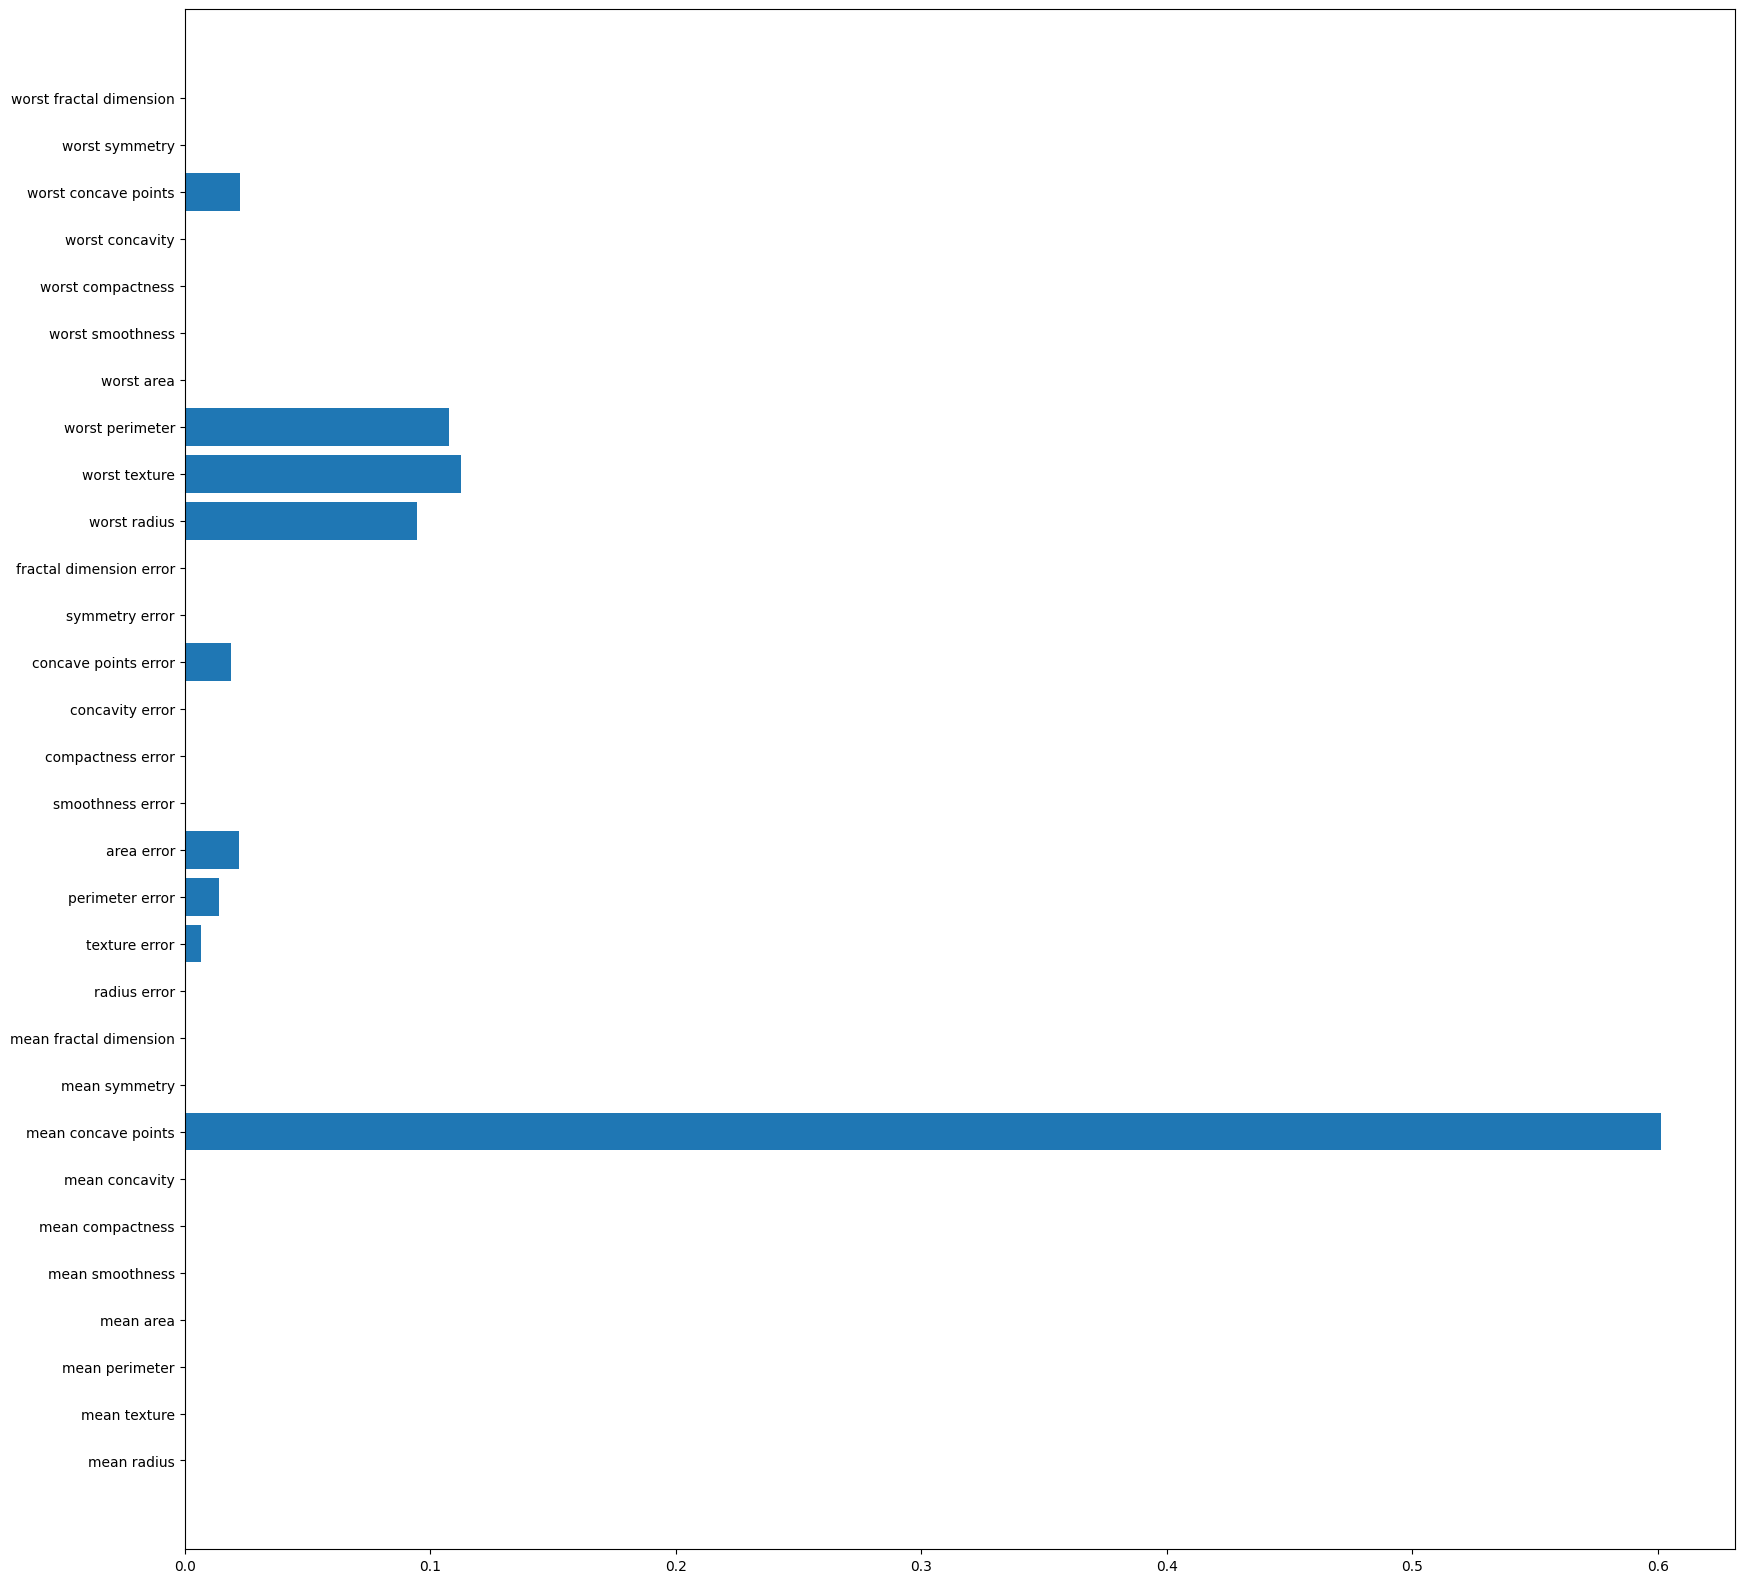

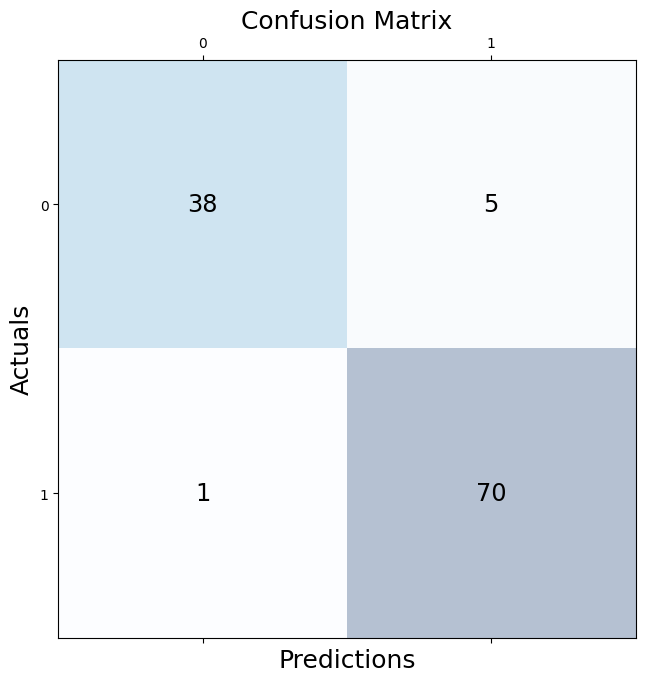

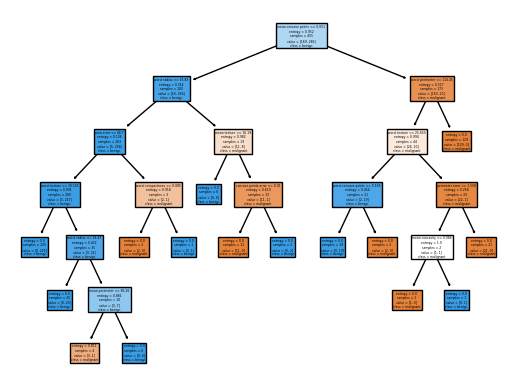

accuracy=0.9473684210526315, f1=0.9589041095890412, precision=0.9333333333333333, recall=0.9859154929577465


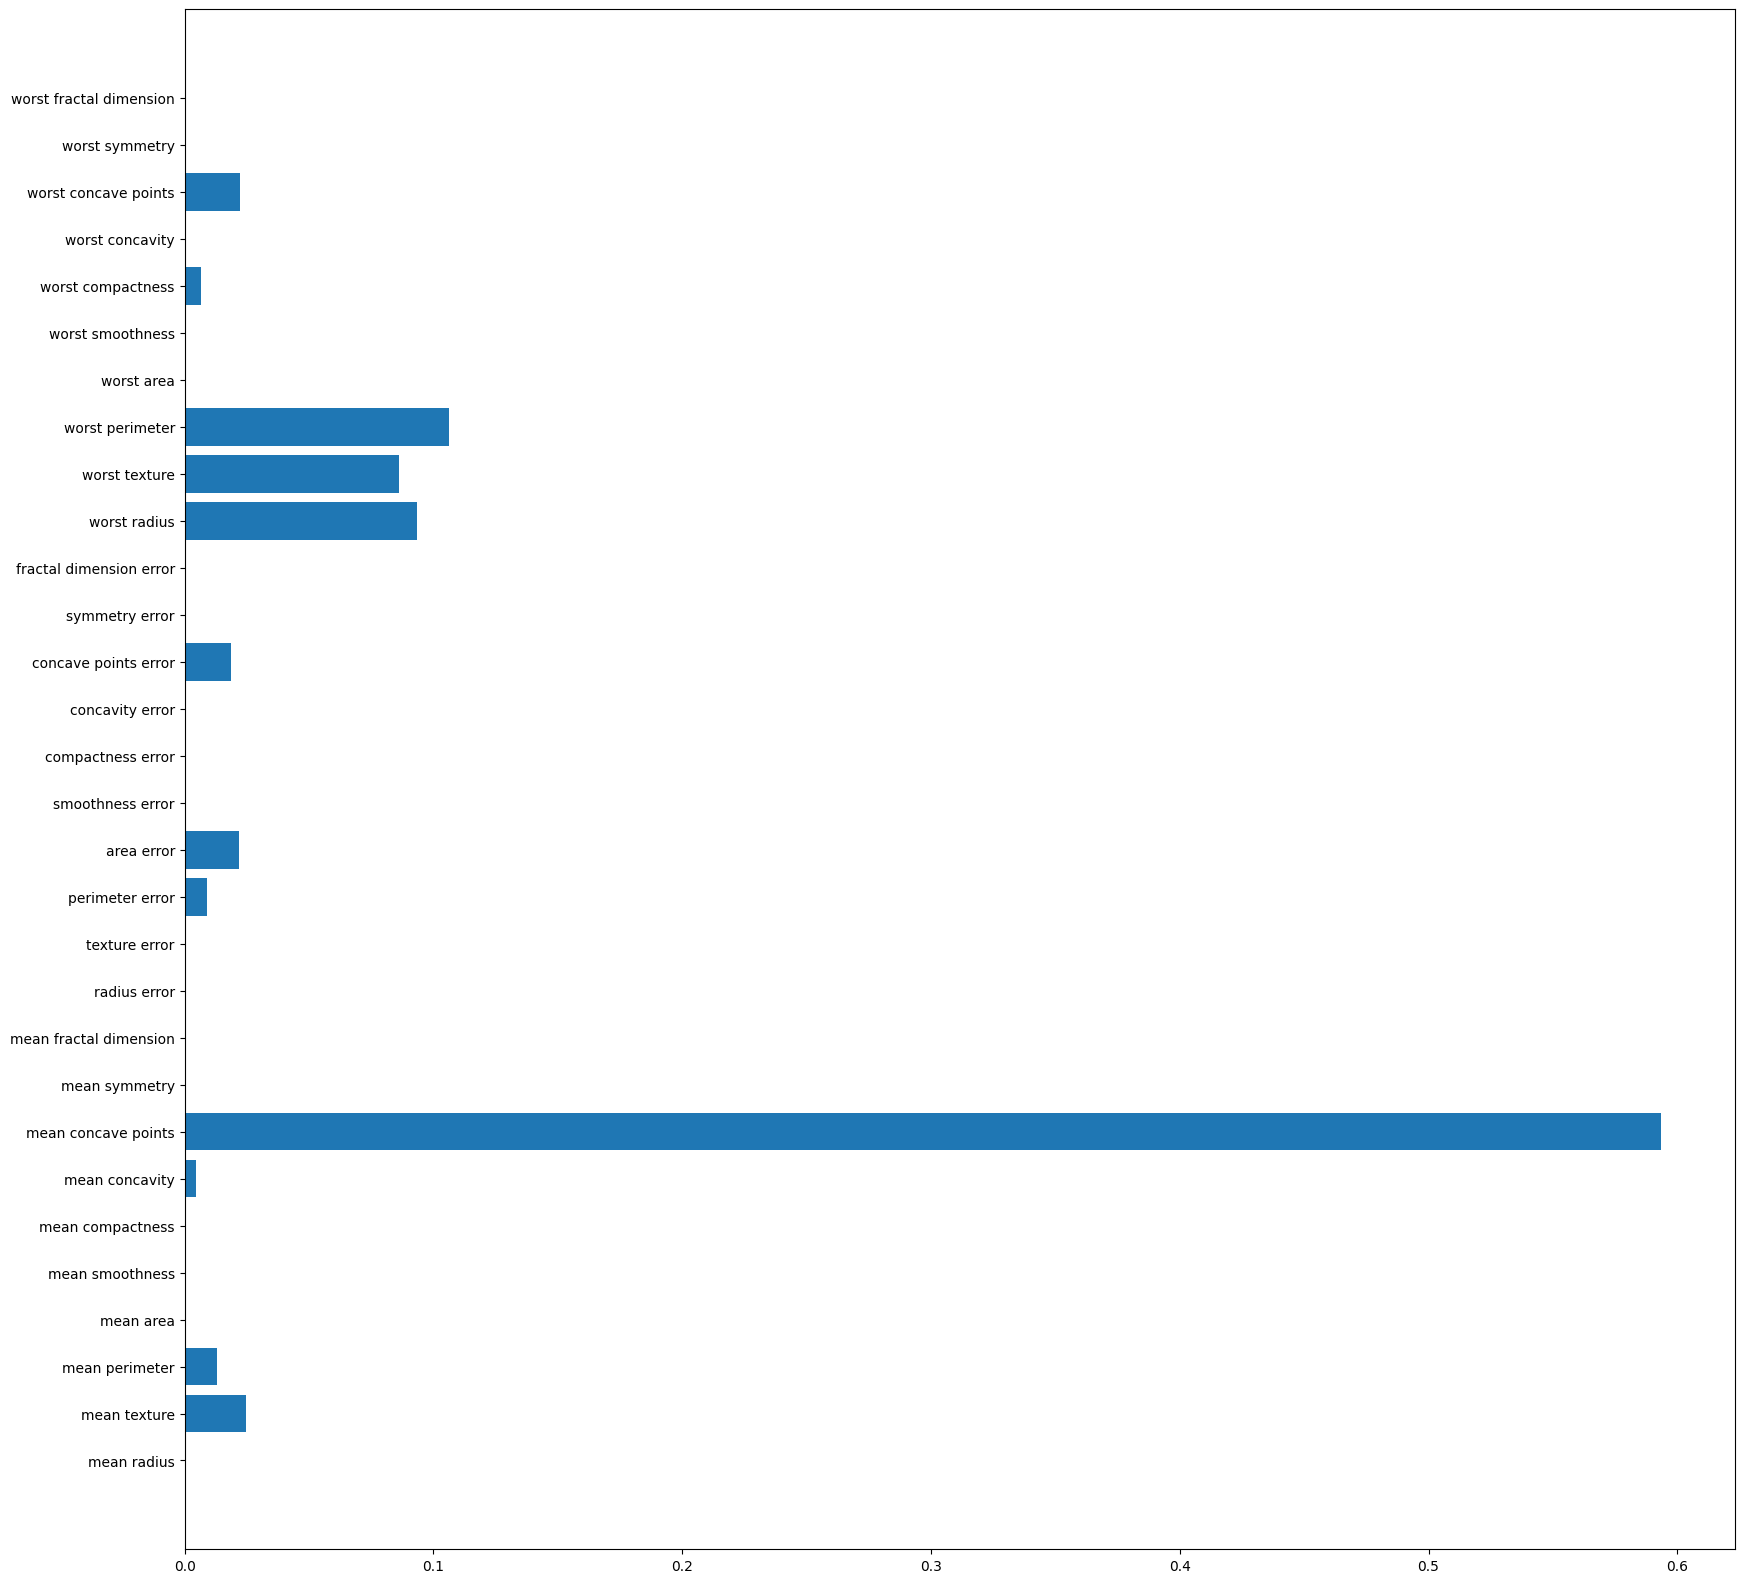

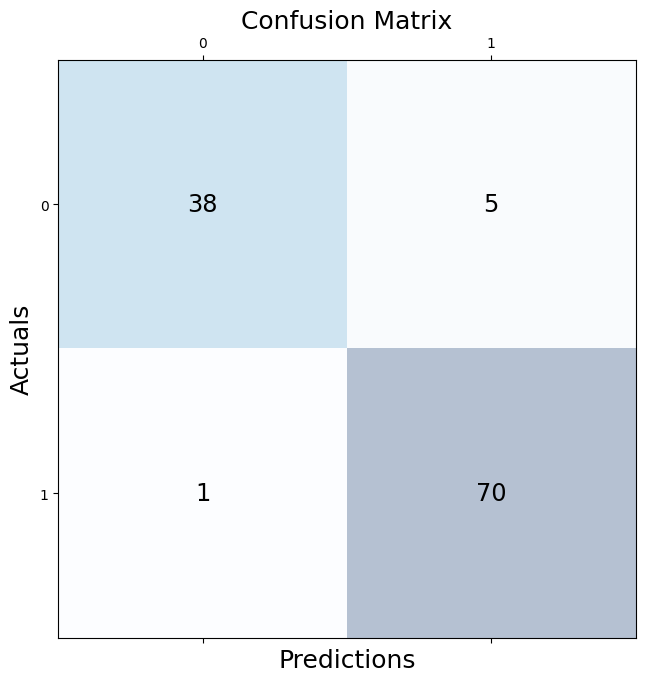

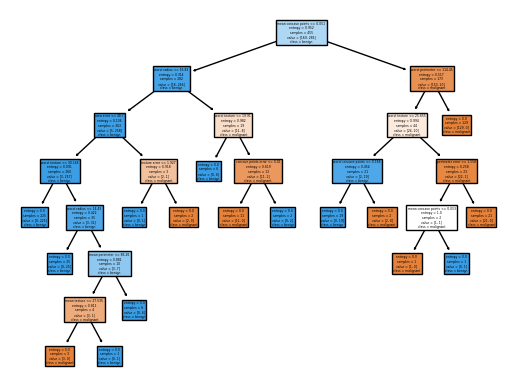

accuracy=0.9473684210526315, f1=0.9589041095890412, precision=0.9333333333333333, recall=0.9859154929577465


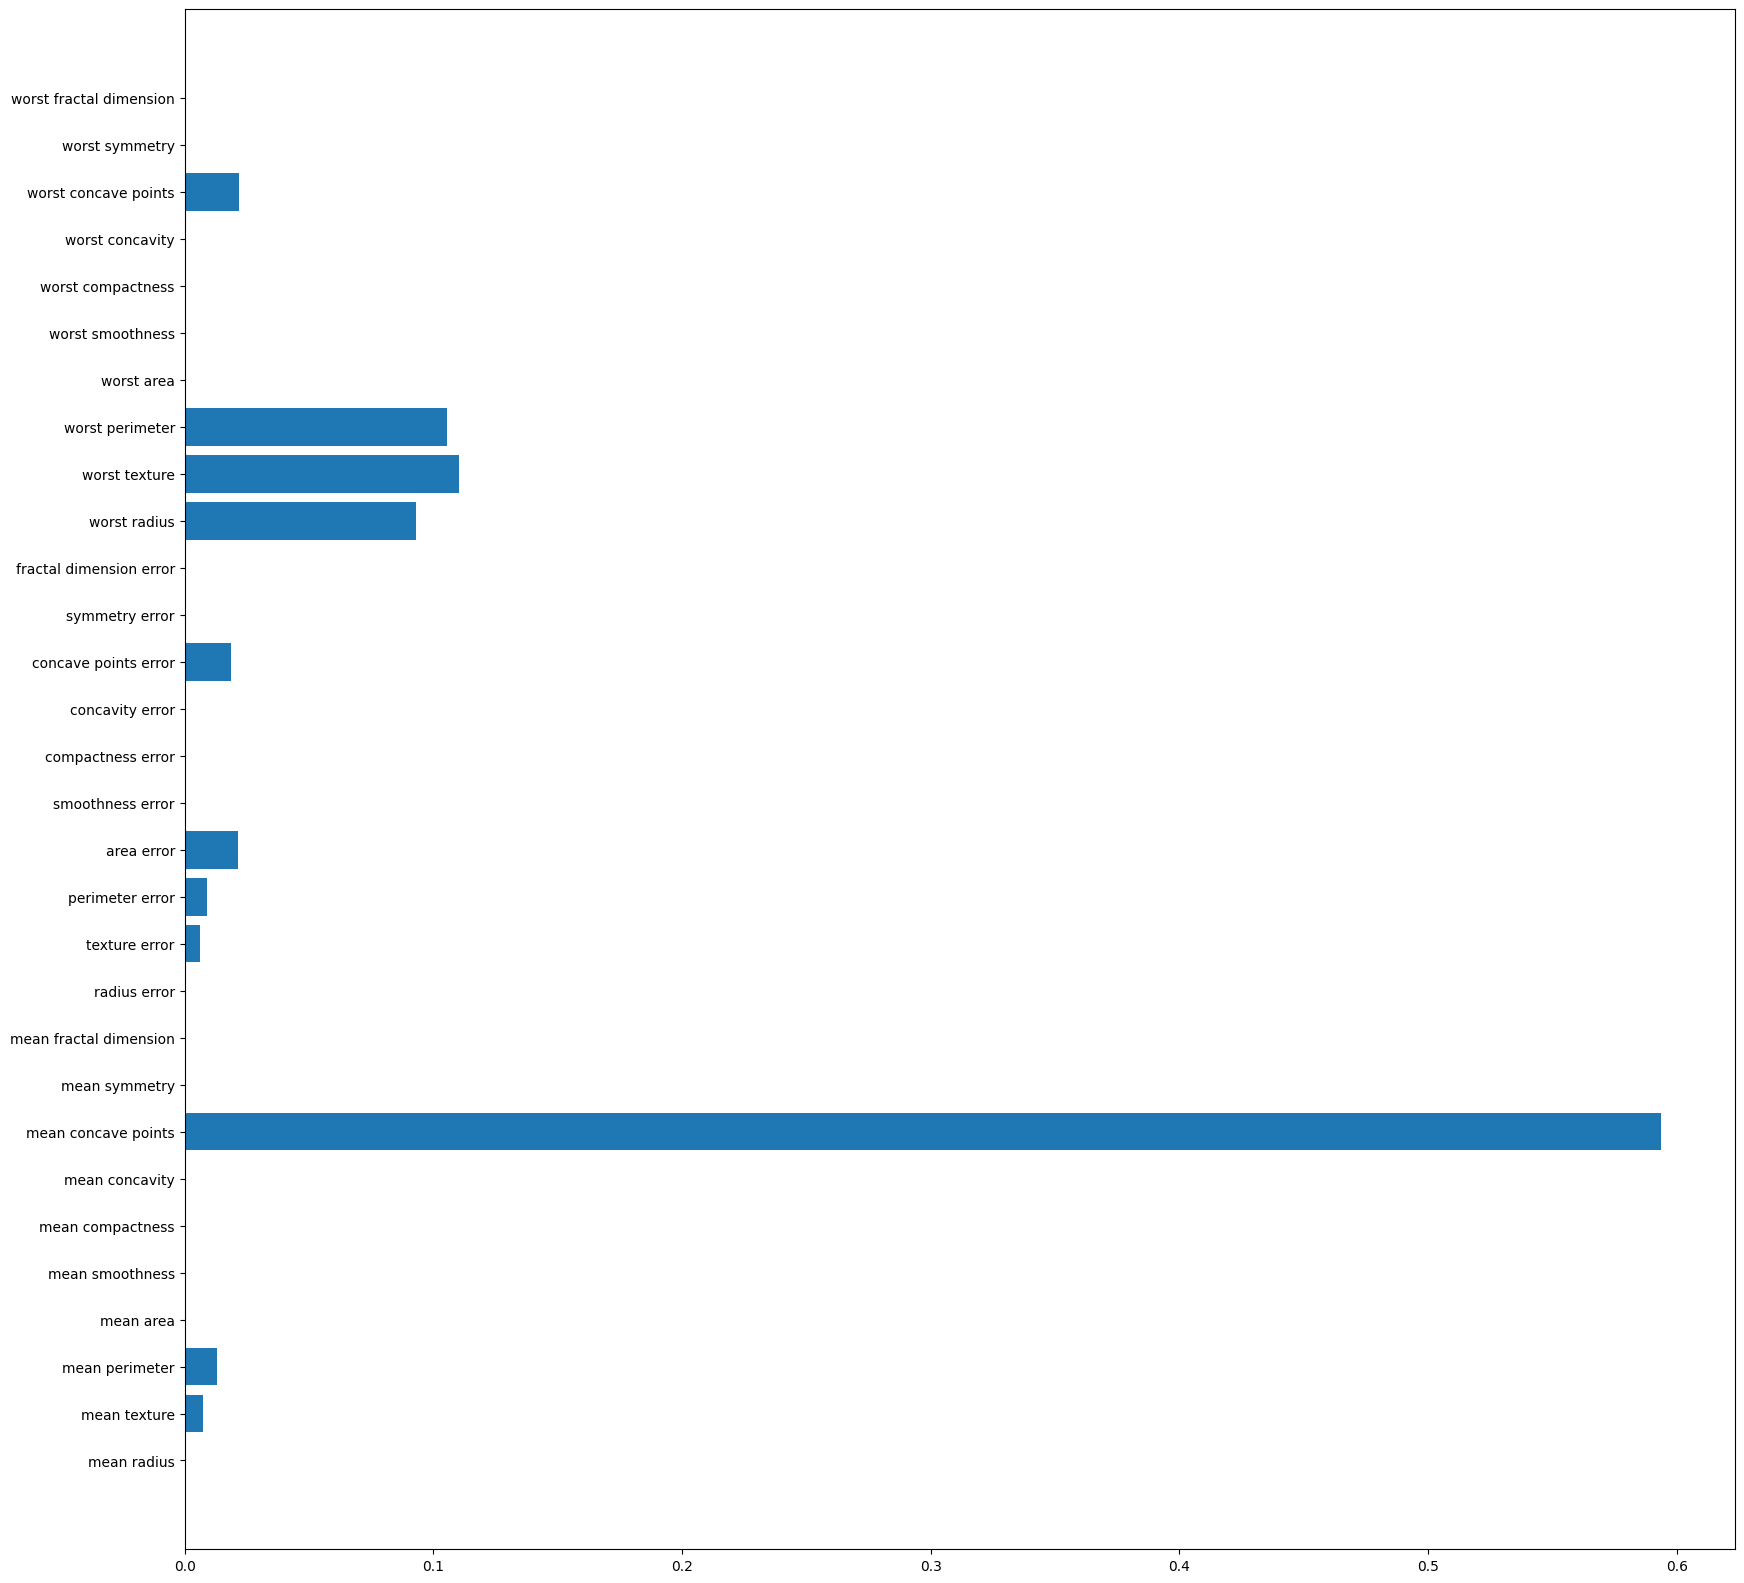

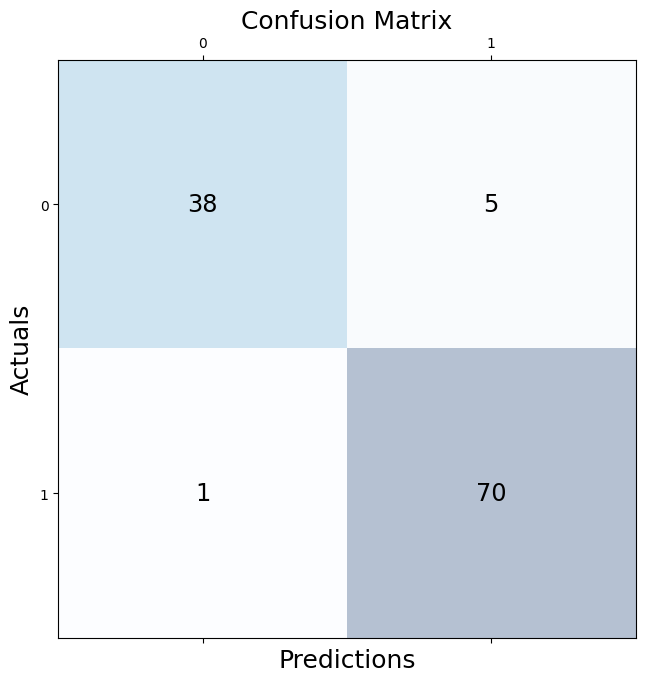

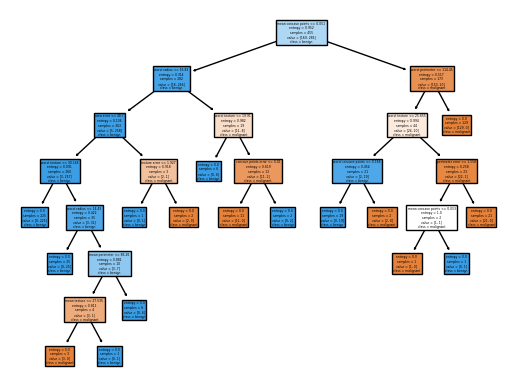

accuracy=0.9473684210526315, f1=0.9589041095890412, precision=0.9333333333333333, recall=0.9859154929577465


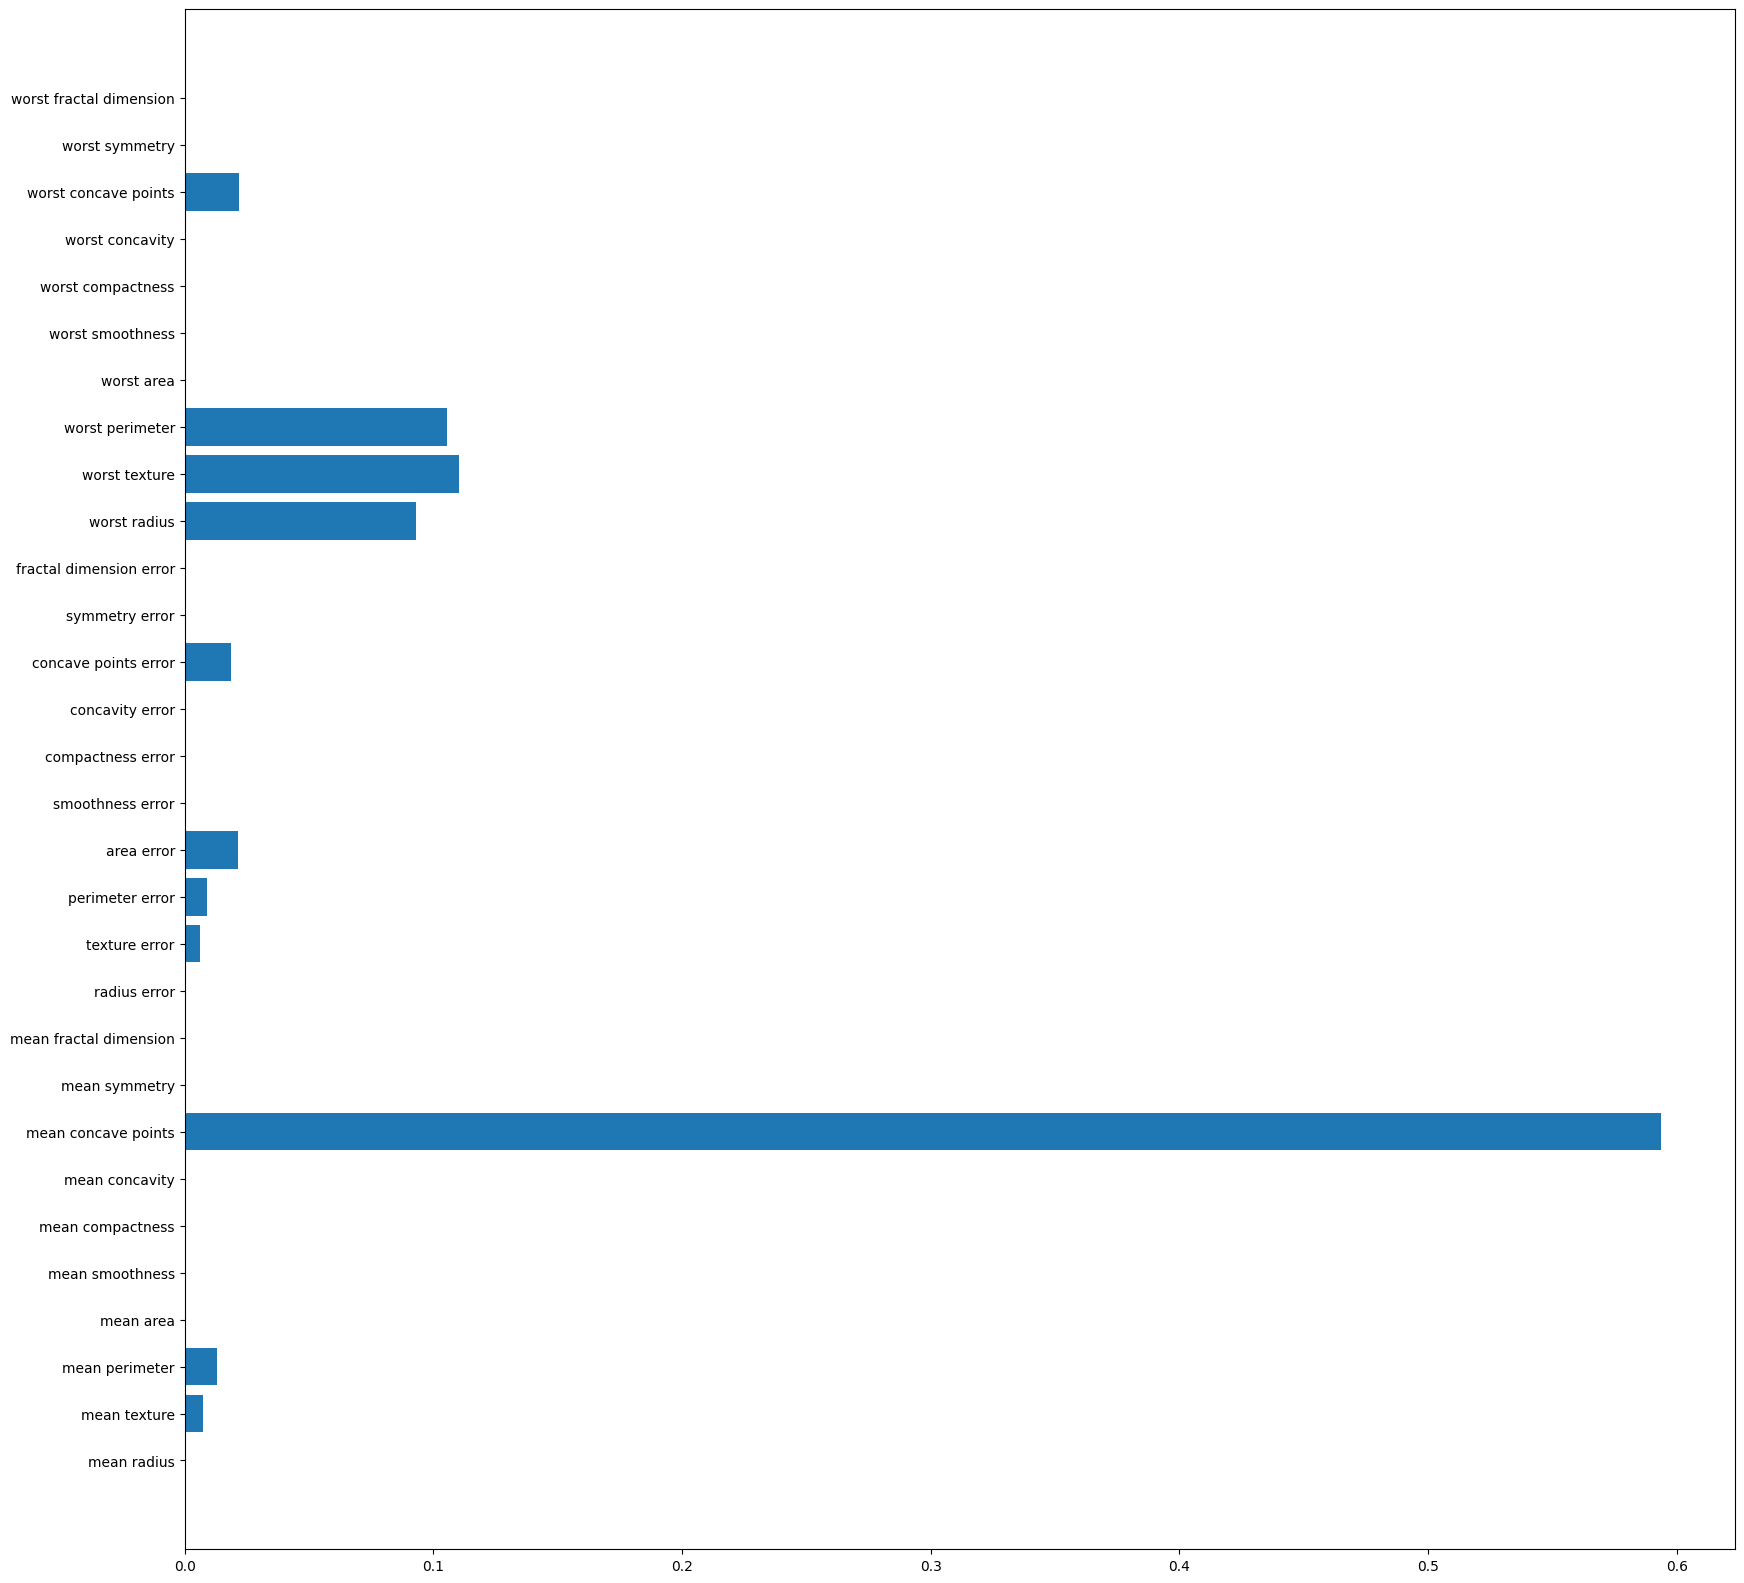

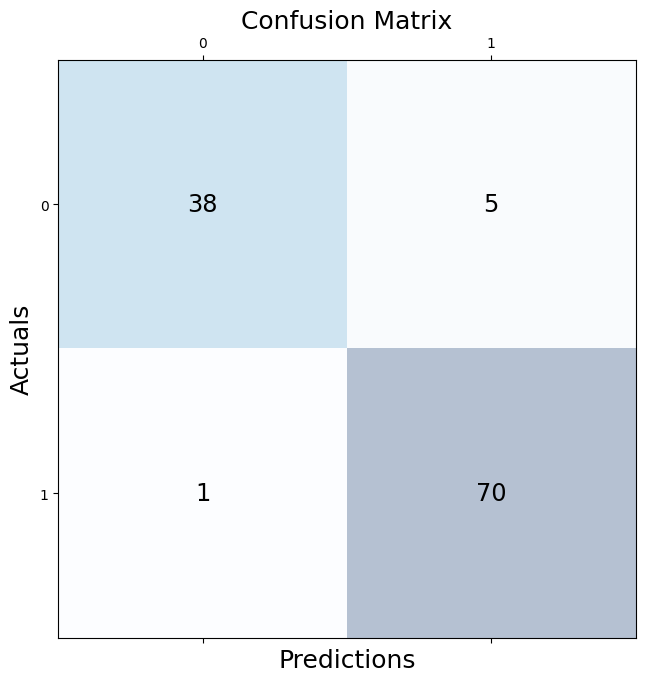

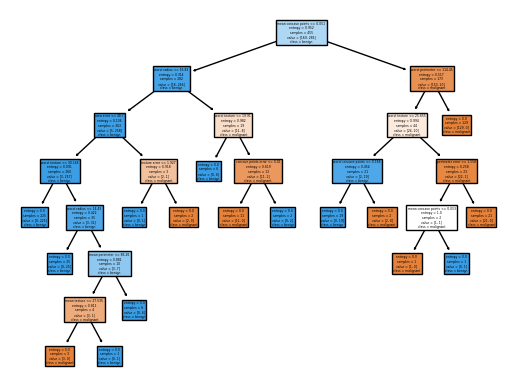

accuracy=0.9473684210526315, f1=0.9589041095890412, precision=0.9333333333333333, recall=0.9859154929577465


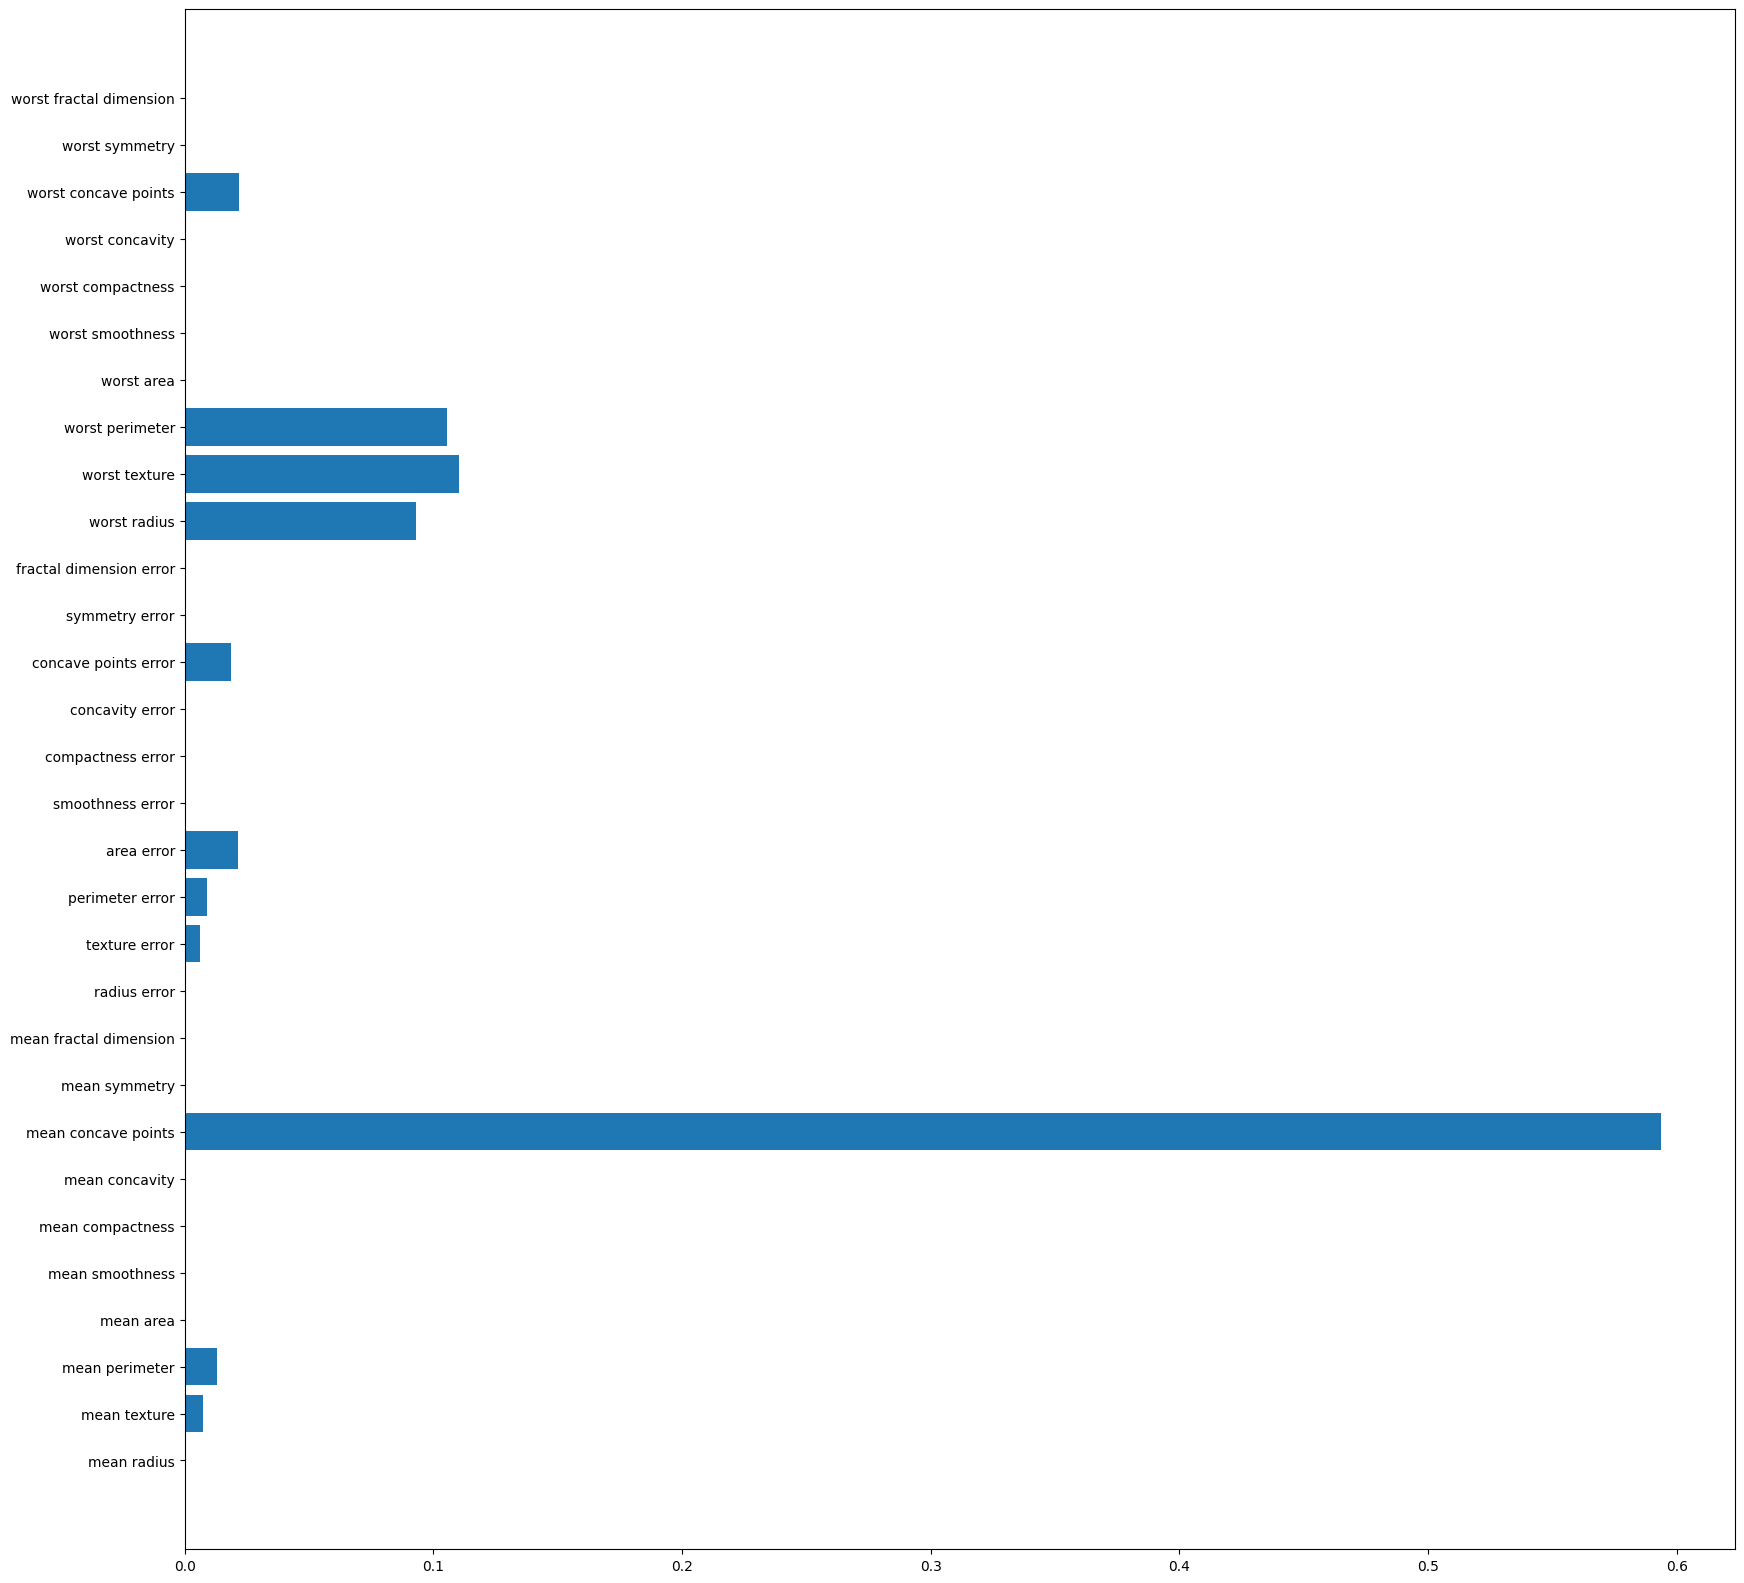

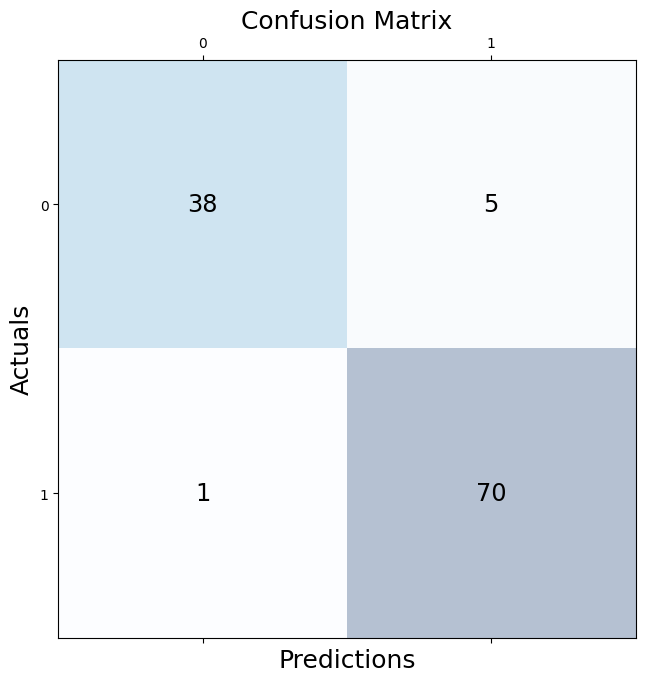

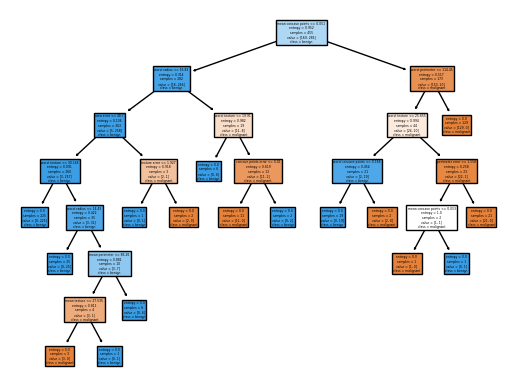

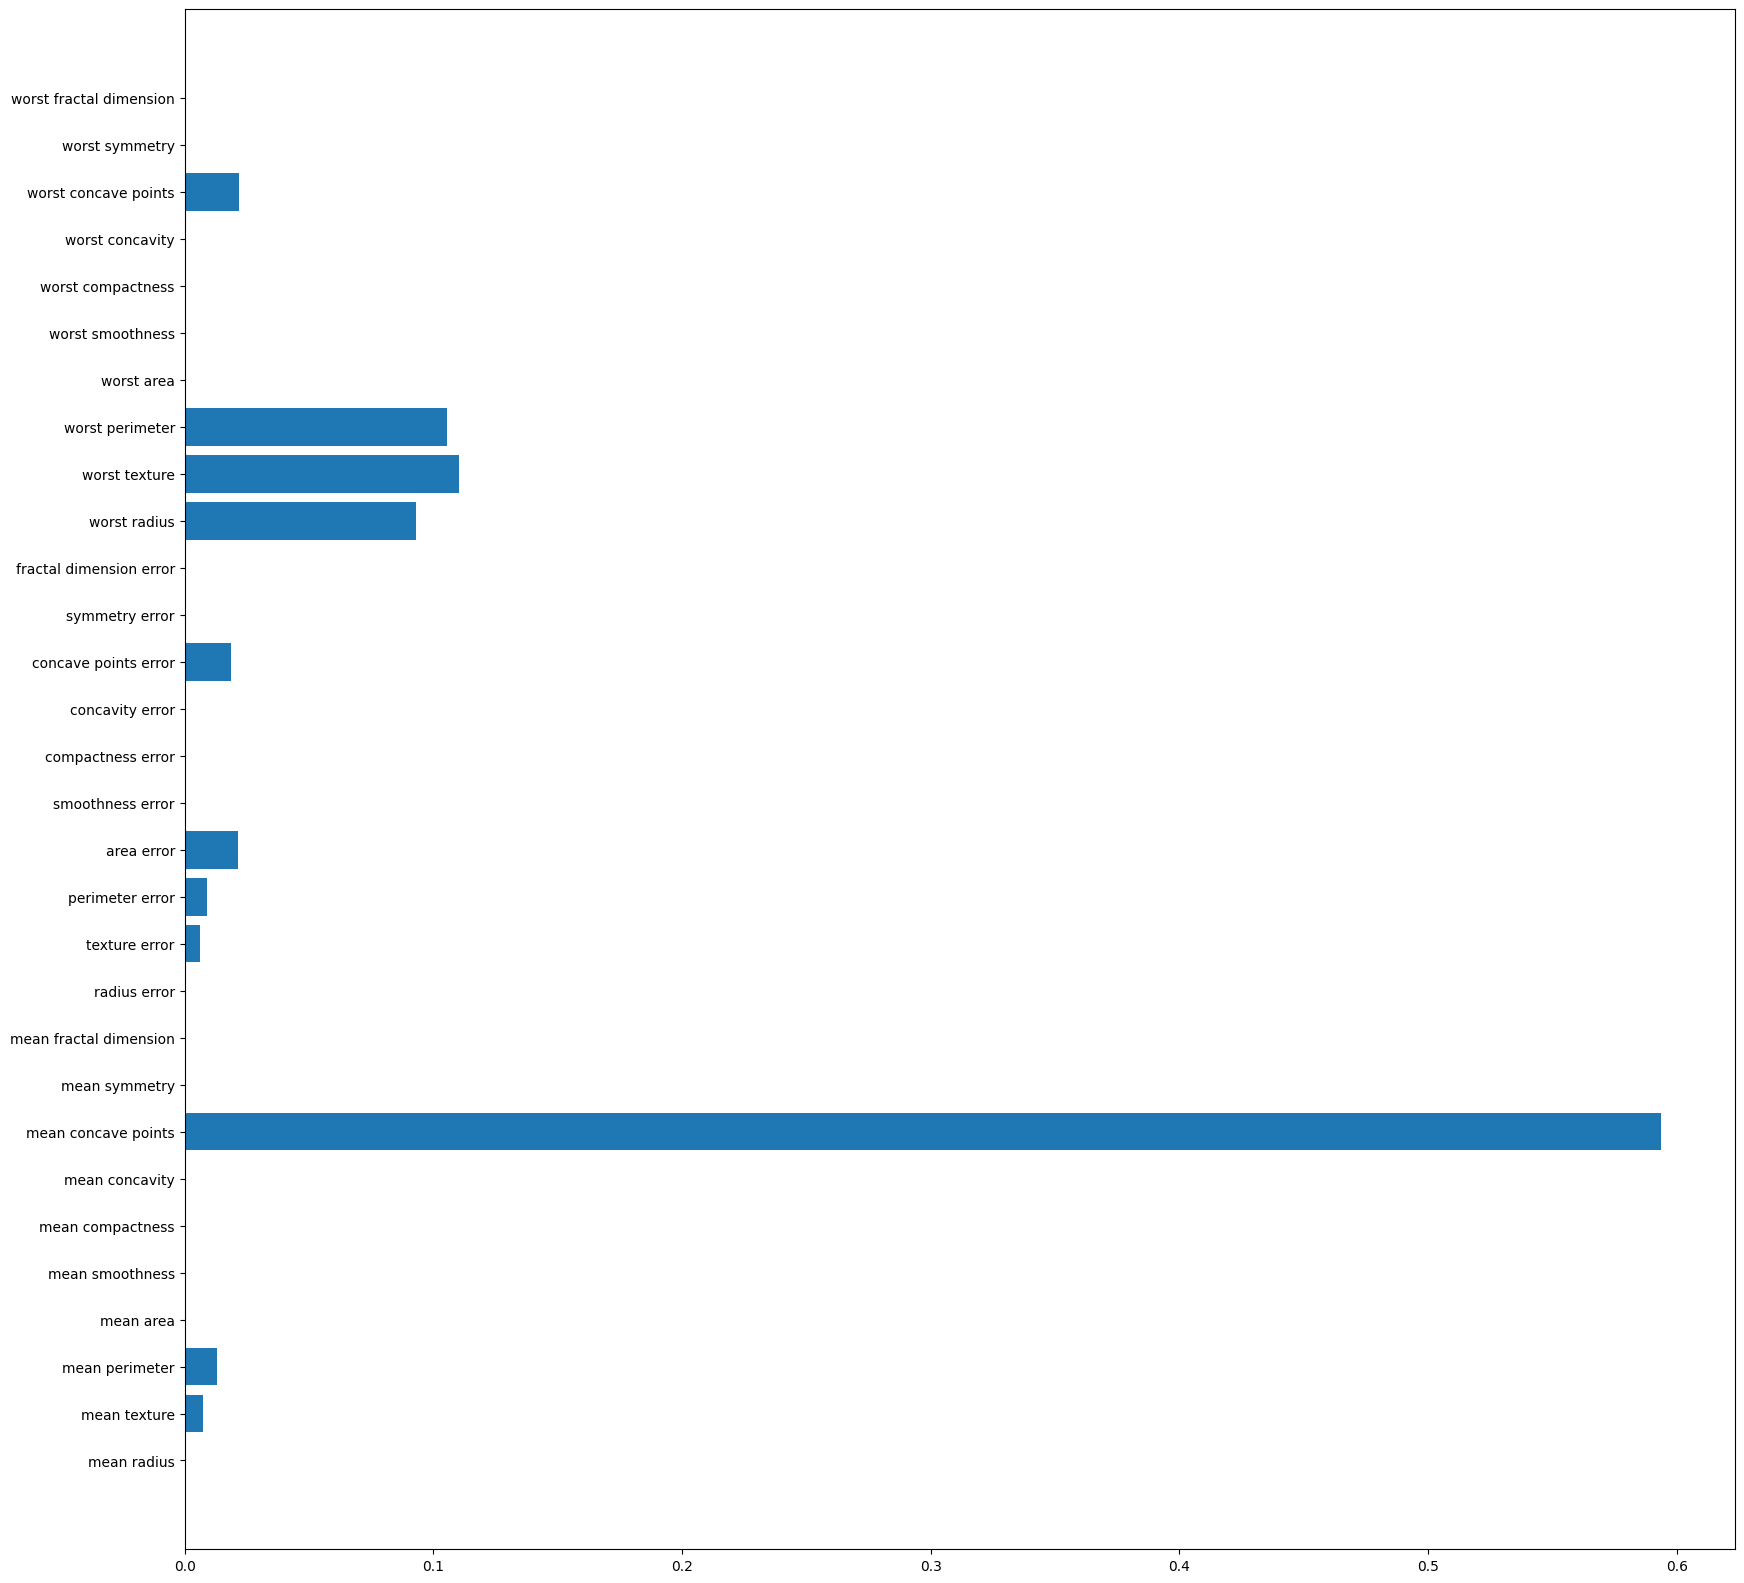

In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

for depth in range(1, 11):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    dt.fit(X_train, Y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    print(f'{accuracy=}, {f1=}, {precision=}, {recall=}')

    c_matrix = confusion_matrix(Y_test, y_pred)

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(c_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(c_matrix.shape[0]):
        for j in range(c_matrix.shape[1]):
            ax.text(x=j, y=i,s=c_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    plot_tree(dt, feature_names=breast_data['feature_names'], filled=True, class_names=breast_data['target_names'])
    plt.show()
    plt.figure(figsize=(20,20))
    plt.barh(breast_data['feature_names'], dt.feature_importances_)


accuracy=0.8947368421052632, f1=0.9154929577464789, precision=0.9154929577464789, recall=0.9154929577464789


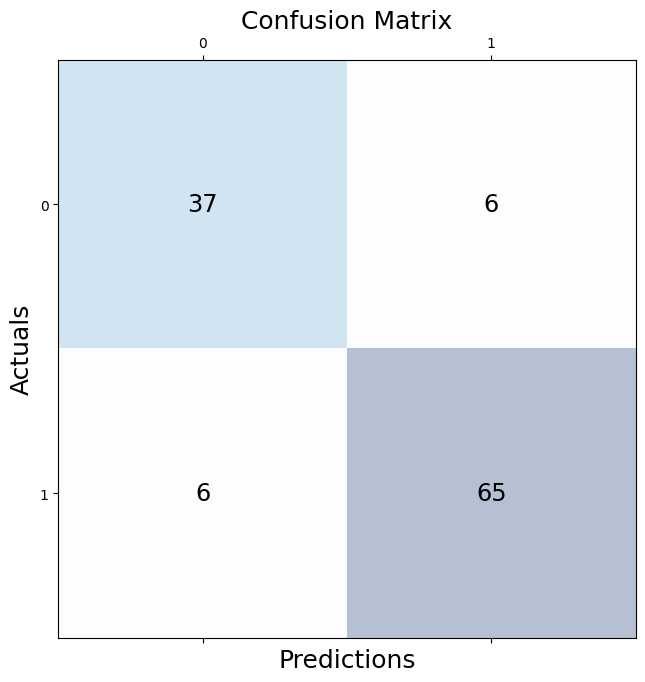

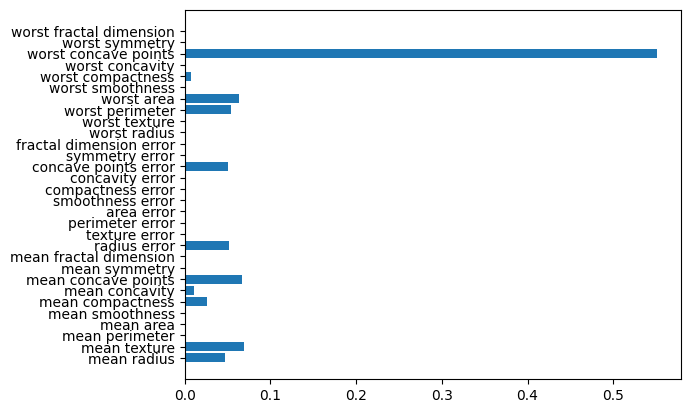

accuracy=0.9298245614035088, f1=0.9428571428571428, precision=0.9565217391304348, recall=0.9295774647887324


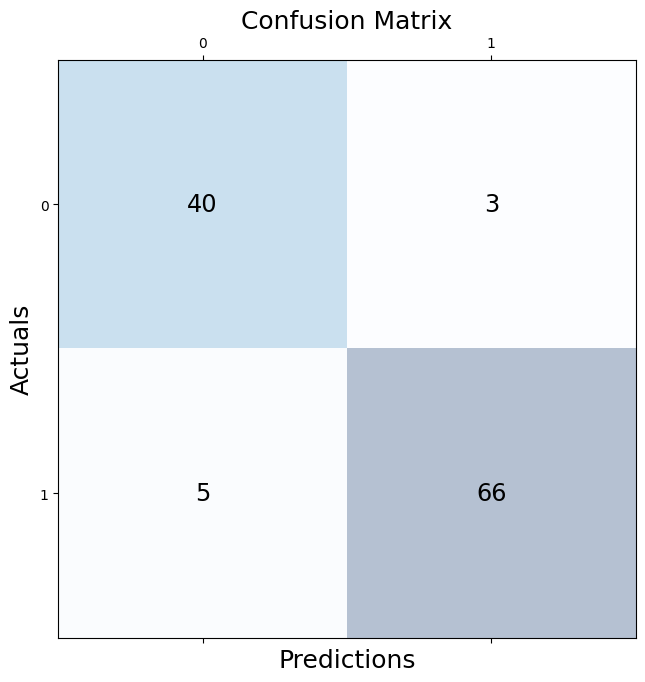

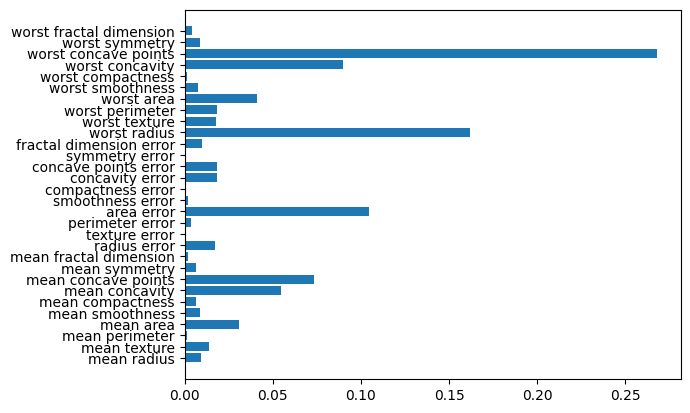

accuracy=0.9649122807017544, f1=0.9722222222222222, precision=0.958904109589041, recall=0.9859154929577465


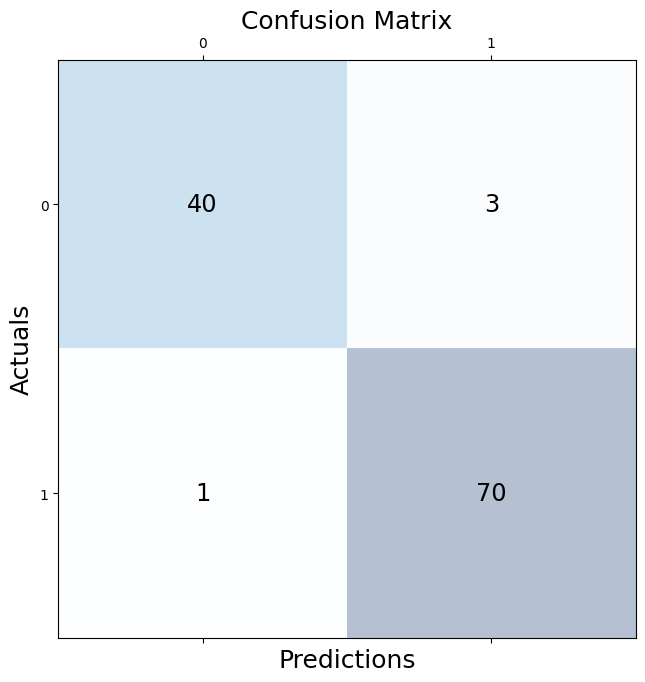

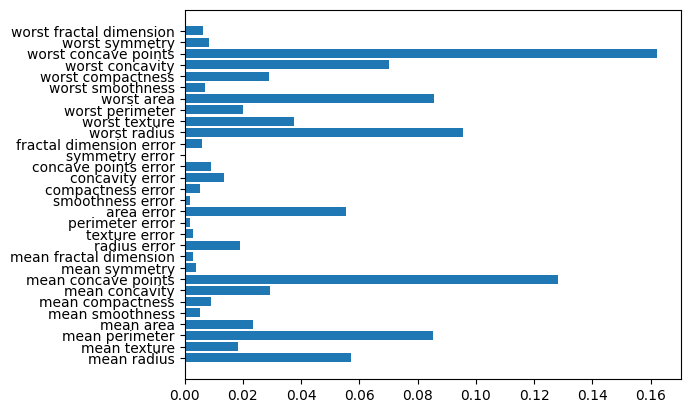

accuracy=0.9736842105263158, f1=0.979020979020979, precision=0.9722222222222222, recall=0.9859154929577465


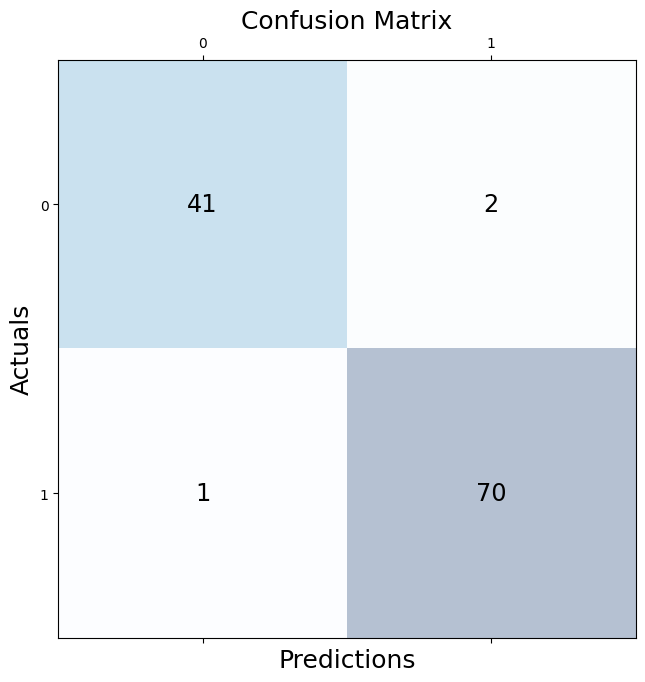

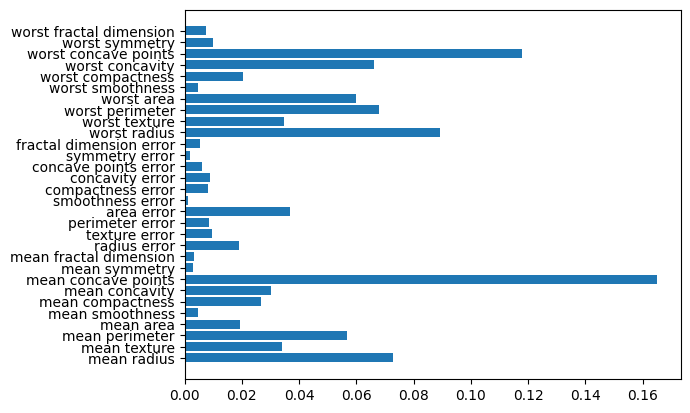

accuracy=0.9736842105263158, f1=0.979020979020979, precision=0.9722222222222222, recall=0.9859154929577465


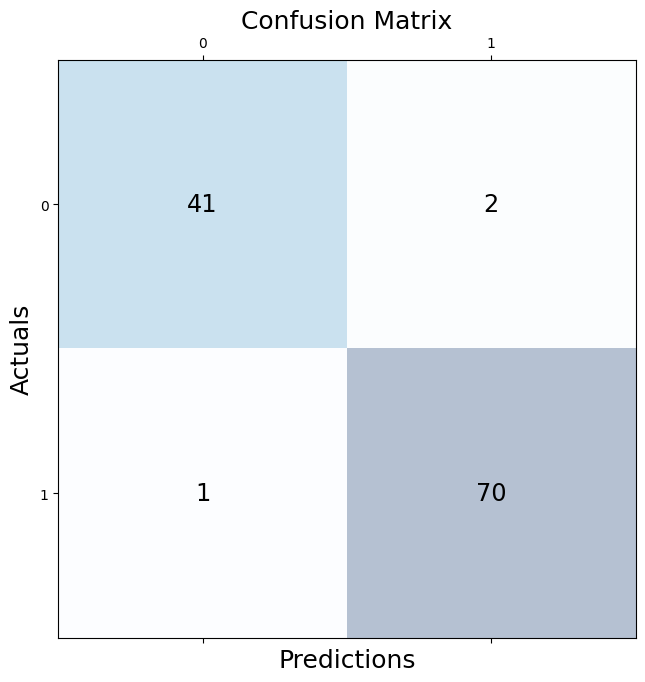

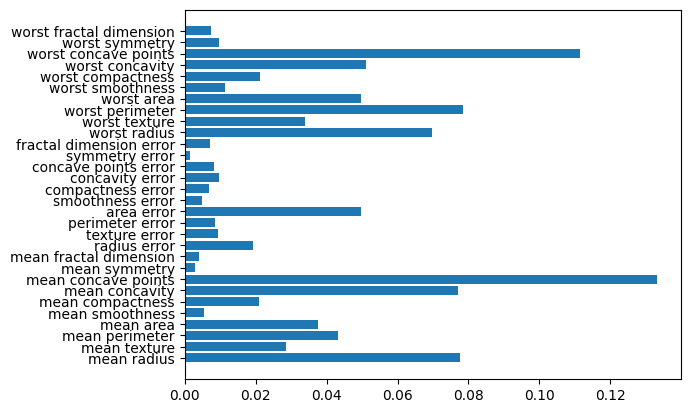

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


for n in (1, 5, 10, 15, 20):
    f = RandomForestClassifier(criterion="entropy", n_estimators=n, random_state=42)
    f.fit(X_train, Y_train)
    y_pred = f.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    print(f'{accuracy=}, {f1=}, {precision=}, {recall=}')

    c_matrix = confusion_matrix(Y_test, y_pred)

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(c_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(c_matrix.shape[0]):
        for j in range(c_matrix.shape[1]):
            ax.text(x=j, y=i,s=c_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    plt.barh(breast_data['feature_names'], f.feature_importances_)
    plt.show()


It looks like the feature importance across the board rises as we do an ensemble of trees. Similarly, the prediction metrics we measured with, increase across the board.